In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime

In [3]:
df = pd.read_csv("Sales_dataset.csv") #read data using pandas

## Data Understanding

In [4]:
df.info() #get information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9919 entries, 0 to 9918
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Row ID         9919 non-null   int64 
 1   Order ID       9919 non-null   object
 2   Order Date     9919 non-null   object
 3   Ship Date      9919 non-null   object
 4   Ship Mode      9919 non-null   object
 5   Customer ID    9919 non-null   object
 6   Customer Name  9919 non-null   object
 7   Segment        9919 non-null   object
 8   Country        9919 non-null   object
 9   City           9893 non-null   object
 10  State          9919 non-null   object
 11  Postal Code    9876 non-null   object
 12  Region         9919 non-null   object
 13  Product ID     9919 non-null   object
 14  Category       9919 non-null   object
 15  Sub-Category   9919 non-null   object
 16  Product Name   9919 non-null   object
 17  Sales          9917 non-null   object
dtypes: int64(1), object(17)
memo

In [5]:
df.head() # error in postal code "?"

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,?,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368


In [6]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9914,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9915,9797,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9916,9798,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9917,9799,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9918,9800,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


In [7]:
df.sample(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
6695,6696,US-2017-155103,2/12/2017,7/12/2017,Standard Class,JF-15190,Jamie Frazer,Consumer,United States,New York City,New York,10024,East,OFF-BI-10004318,Office Supplies,Binders,Ibico EB-19 Dual Function Manual Binding System,415.176
12,13,CA-2018-114412,15/04/2018,20/04/2018,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,28027,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552
4185,4186,CA-2017-111493,21/10/2017,22/10/2017,First Class,CM-12160,Charles McCrossin,Consumer,United States,Baltimore,Maryland,21215,East,TEC-AC-10004510,Technology,Accessories,Logitech Desktop MK120 Mouse and keyboard Combo,98.16
7719,7720,CA-2016-108588,5/1/2016,10/1/2016,Standard Class,BG-11695,Brooke Gillingham,Corporate,United States,New York City,New York,10009,East,OFF-AR-10001615,Office Supplies,Art,Newell 34,59.52
3960,3961,CA-2016-113901,19/10/2016,24/10/2016,Standard Class,NH-18610,Nicole Hansen,Corporate,United States,Detroit,Michigan,48227,Central,OFF-BI-10001249,Office Supplies,Binders,Avery Heavy-Duty EZD View Binder with Locking ...,38.28
8069,8070,CA-2018-151750,1/1/2018,5/1/2018,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.56
8370,8371,CA-2017-163972,17/10/2017,21/10/2017,Standard Class,MG-17890,Michael Granlund,Home Office,United States,Fresno,California,93727,West,FUR-BO-10003894,Furniture,Bookcases,"Safco Value Mate Steel Bookcase, Baked Enamel ...",120.666
3961,3962,CA-2016-113901,19/10/2016,24/10/2016,Standard Class,NH-18610,Nicole Hansen,Corporate,United States,Detroit,Michigan,48227,Central,TEC-PH-10002564,Technology,Phones,OtterBox Defender Series Case - Samsung Galaxy S4,149.95
5840,5841,CA-2016-134992,22/09/2016,26/09/2016,Second Class,MG-17875,Michael Grace,Home Office,United States,Arlington,Virginia,22204,South,FUR-FU-10002554,Furniture,Furnishings,"Westinghouse Floor Lamp with Metal Mesh Shade,...",47.98
443,444,CA-2017-115756,5/9/2017,7/9/2017,Second Class,PK-19075,Pete Kriz,Consumer,United States,Detroit,Michigan,48227,Central,OFF-PA-10002222,Office Supplies,Paper,"Xerox Color Copier Paper, 11"" x 17"", Ream",91.36


## Data cleaning and Univariate analysis

In [8]:
df.duplicated().sum() #Check Number of Duplicated Values

np.int64(119)

In [9]:
df.drop_duplicates(inplace=True) #drop duplicated

In [10]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,?,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376


In [11]:
#check for wrong values
df["Order ID"].unique().tolist()

['CA-2017-152156',
 'CA-2017-138688',
 'US-2016-108966',
 'CA-2015-115812',
 'CA-2018-114412',
 'CA-2017-161389',
 'US-2016-118983',
 'CA-2015-105893',
 'CA-2015-167164',
 'CA-2015-143336',
 'CA-2017-137330',
 'US-2018-156909',
 'CA-2016-106320',
 'CA-2017-121755',
 'US-2016-150630',
 'CA-2018-107727',
 'CA-2017-117590',
 'CA-2016-117415',
 'CA-2018-120999',
 'CA-2017-101343',
 'CA-2018-139619',
 'CA-2017-118255',
 'CA-2015-146703',
 'CA-2017-169194',
 'CA-2016-115742',
 'CA-2017-105816',
 'CA-2017-111682',
 'CA-2016-135545',
 'US-2016-164175',
 'CA-2015-106376',
 'CA-2017-119823',
 'CA-2017-106075',
 'CA-2018-114440',
 'US-2016-134026',
 'US-2018-118038',
 'US-2015-147606',
 'CA-2017-127208',
 'CA-2015-139451',
 'CA-2016-149734',
 'US-2018-119662',
 'CA-2018-140088',
 'CA-2018-155558',
 'CA-2017-159695',
 'CA-2017-109806',
 'CA-2016-149587',
 'US-2018-109484',
 'CA-2018-161018',
 'CA-2018-157833',
 'CA-2017-149223',
 'CA-2017-158568',
 'CA-2017-129903',
 'US-2016-156867',
 'CA-2018-11

In [12]:
df["Order Date"].unique().tolist()

['8/11/2017',
 '12/6/2017',
 '11/10/2016',
 '9/6/2015',
 '15/04/2018',
 '5/12/2017',
 '22/11/2016',
 '11/11/2015',
 '13/05/2015',
 '27/08/2015',
 '9/12/2017',
 '16/07/2018',
 '25/09/2016',
 '16/01/2017',
 '17/09/2016',
 '19/10/2018',
 '8/12/2017',
 '27/12/2016',
 '10/9/2018',
 '17/07/2017',
 '19/09/2018',
 '11/3/2017',
 '20/10/2015',
 '20/06/2017',
 '18/04/2016',
 '11/12/2017',
 '17/06/2017',
 '24/11/2016',
 '30/04/2016',
 '5/12/2015',
 '4/6/2017',
 '18/09/2017',
 '14/09/2018',
 '26/04/2016',
 '9/12/2018',
 '26/11/2015',
 '12/10/2015',
 '3/9/2016',
 '13/11/2018',
 '28/05/2018',
 '26/10/2018',
 '5/4/2017',
 '17/09/2017',
 '31/01/2016',
 '6/11/2018',
 '9/11/2018',
 '17/06/2018',
 '6/9/2017',
 '29/08/2017',
 '1/12/2017',
 '13/11/2016',
 '23/11/2018',
 '15/10/2016',
 '25/12/2018',
 '3/11/2017',
 '25/08/2015',
 '2/3/2016',
 '5/4/2016',
 '26/12/2015',
 '20/09/2015',
 '5/11/2018',
 '6/11/2017',
 '2/2/2018',
 '13/10/2017',
 '5/9/2017',
 '18/09/2018',
 '22/12/2018',
 '7/9/2016',
 '22/10/2015',


In [13]:
df["Ship Date"].unique().tolist()

['11/11/2017',
 '16/06/2017',
 '18/10/2016',
 '14/06/2015',
 '20/04/2018',
 '10/12/2017',
 '26/11/2016',
 '18/11/2015',
 '15/05/2015',
 '1/9/2015',
 '13/12/2017',
 '18/07/2018',
 '30/09/2016',
 '20/01/2017',
 '21/09/2016',
 '23/10/2018',
 '31/12/2016',
 '15/09/2018',
 '22/07/2017',
 '23/09/2018',
 '13/03/2017',
 '25/10/2015',
 '25/06/2017',
 '22/04/2016',
 '17/12/2017',
 '18/06/2017',
 '30/11/2016',
 '5/5/2016',
 '10/12/2015',
 '6/6/2017',
 '23/09/2017',
 '17/09/2018',
 '2/5/2016',
 '11/12/2018',
 '1/12/2015',
 '15/06/2017',
 '16/10/2015',
 '8/9/2016',
 '16/11/2018',
 '30/05/2018',
 '2/11/2018',
 '10/4/2017',
 '22/09/2017',
 '5/2/2016',
 '12/11/2018',
 '11/11/2018',
 '20/06/2018',
 '11/9/2017',
 '2/9/2017',
 '4/12/2017',
 '17/11/2016',
 '28/11/2018',
 '20/10/2016',
 '30/12/2018',
 '10/11/2017',
 '27/08/2015',
 '6/3/2016',
 '10/4/2016',
 '28/12/2015',
 '25/09/2015',
 '5/2/2018',
 '19/10/2017',
 '7/9/2017',
 '27/12/2018',
 '12/9/2016',
 '28/10/2015',
 '9/12/2017',
 '16/03/2017',
 '2/6/20

In [14]:
df["Ship Mode"].unique().tolist()

['Second Class', 'Standard Class', 'First Class', 'Same Day']

In [15]:
df["Ship Mode"].value_counts()

Ship Mode
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: count, dtype: int64

In [16]:
df["Customer Name"].unique().tolist()

['Claire Gute',
 'Darrin Van Huff',
 "Sean O'Donnell",
 'Brosina Hoffman',
 'Andrew Allen',
 'Irene Maddox',
 'Harold Pawlan',
 'Pete Kriz',
 'Alejandro Grove',
 'Zuschuss Donatelli',
 'Ken Black',
 'Sandra Flanagan',
 'Emily Burns',
 'Eric Hoffmann',
 'Tracy Blumstein',
 'Matt Abelman',
 'Gene Hale',
 'Steve Nguyen',
 'Linda Cazamias',
 'Ruben Ausman',
 'Erin Smith',
 'Odella Nelson',
 "Patrick O'Donnell",
 'Lena Hernandez',
 'Darren Powers',
 'Janet Molinari',
 'Ted Butterfield',
 'Kunst Miller',
 'Paul Stevenson',
 'Brendan Sweed',
 'Karen Daniels',
 'Henry MacAllister',
 'Joel Eaton',
 'Ken Brennan',
 'Stewart Carmichael',
 'Duane Noonan',
 'Julie Creighton',
 'Christopher Schild',
 'Paul Gonzalez',
 'Gary Mitchum',
 'Jim Sink',
 'Karl Braun',
 'Roger Barcio',
 'Parhena Norris',
 'Katherine Ducich',
 'Elpida Rittenbach',
 'Rick Bensley',
 'Gary Zandusky',
 'Lena Cacioppo',
 'Janet Martin',
 'Pete Armstrong',
 'Cynthia Voltz',
 'Clay Ludtke',
 'Ryan Crowe',
 'Dave Kipp',
 'Greg Guth

In [17]:
df["Segment"].unique().tolist()

['Consumer', 'Corporate', 'Home Office']

In [18]:
df["Country"].unique().tolist() #Error "x"

['United States', 'x']

In [19]:
df["City"].unique().tolist() #Null values

['Henderson',
 'Los Angeles',
 'Fort Lauderdale',
 'Concord',
 'Seattle',
 'Fort Worth',
 'Madison',
 'West Jordan',
 'San Francisco',
 'Fremont',
 'Philadelphia',
 'Orem',
 'Houston',
 'Richardson',
 'Naperville',
 'Melbourne',
 'Eagan',
 'Westland',
 'Dover',
 'New Albany',
 'New York City',
 'Troy',
 'Chicago',
 'Gilbert',
 'Springfield',
 'Jackson',
 'Memphis',
 'Decatur',
 'Durham',
 'Columbia',
 'Rochester',
 'Minneapolis',
 'Portland',
 'Saint Paul',
 'Aurora',
 'Charlotte',
 'Orland Park',
 'Urbandale',
 'Columbus',
 'Bristol',
 'Wilmington',
 'Bloomington',
 'Phoenix',
 'Roseville',
 'Independence',
 'Pasadena',
 'Newark',
 'Franklin',
 'Scottsdale',
 'San Jose',
 'Edmond',
 'Carlsbad',
 'San Antonio',
 'Monroe',
 'Fairfield',
 'Grand Prairie',
 'Redlands',
 'Hamilton',
 'Westfield',
 nan,
 'Denver',
 'Dallas',
 'Whittier',
 'Saginaw',
 'Medina',
 'Dublin',
 'Detroit',
 'Tampa',
 'Santa Clara',
 'Lakeville',
 'San Diego',
 'Brentwood',
 'Chapel Hill',
 'Morristown',
 'Cincinna

In [20]:
df["State"].unique().tolist()

['Kentucky',
 'California',
 'Florida',
 'North Carolina',
 'Washington',
 'Texas',
 'Wisconsin',
 'Utah',
 'Nebraska',
 'Pennsylvania',
 'Illinois',
 'Minnesota',
 'Michigan',
 'Delaware',
 'Indiana',
 'New York',
 'Arizona',
 'Virginia',
 'Tennessee',
 'Alabama',
 'South Carolina',
 'Oregon',
 'Colorado',
 'Iowa',
 'Ohio',
 'Missouri',
 'Oklahoma',
 'New Mexico',
 'Louisiana',
 'Connecticut',
 'New Jersey',
 'Massachusetts',
 'Georgia',
 'Nevada',
 'Rhode Island',
 'Mississippi',
 'Arkansas',
 'Montana',
 'New Hampshire',
 'Maryland',
 'District of Columbia',
 'Kansas',
 'Vermont',
 'Maine',
 'South Dakota',
 'Idaho',
 'North Dakota',
 'Wyoming',
 'West Virginia']

In [21]:
df["Postal Code"].unique().tolist() #Error "?","Null values","x"

['42420',
 '?',
 '90036',
 '33311',
 '90032',
 '28027',
 '98103',
 '76106',
 '53711',
 '84084',
 '94109',
 '68025',
 '19140',
 '84057',
 '90049',
 '77095',
 '75080',
 '77041',
 '60540',
 '32935',
 '55122',
 '48185',
 '19901',
 '47150',
 '10024',
 '12180',
 '90004',
 '60610',
 '85234',
 '22153',
 '10009',
 '49201',
 '38109',
 '77070',
 '35601',
 '94122',
 '27707',
 '60623',
 '29203',
 '55901',
 '55407',
 '97206',
 '55106',
 '80013',
 '28205',
 '60462',
 '10035',
 '50322',
 '43229',
 '37620',
 '19805',
 '61701',
 '85023',
 '95661',
 '64055',
 '91104',
 '43055',
 '53132',
 '85254',
 '95123',
 '98105',
 '98115',
 '73034',
 '90045',
 '19134',
 '88220',
 '78207',
 '77036',
 '62521',
 '71203',
 '6824',
 nan,
 '75051',
 '92374',
 '45011',
 '7090',
 '19120',
 '44312',
 '80219',
 '75220',
 '37064',
 '90604',
 '48601',
 '44256',
 '43017',
 '48227',
 '38401',
 '33614',
 '95051',
 '55044',
 '92037',
 '77506',
 '94513',
 '27514',
 '7960',
 '45231',
 '94110',
 '90301',
 '33319',
 '80906',
 '7109',
 '

In [22]:
df["Region"].unique().tolist()

['South', 'West', 'Central', 'East']

In [23]:
df["Region"].value_counts()

Region
West       3140
East       2785
Central    2277
South      1598
Name: count, dtype: int64

In [24]:
df["Product ID"].unique().tolist()

['FUR-BO-10001798',
 'FUR-CH-10000454',
 'OFF-LA-10000240',
 'FUR-TA-10000577',
 'OFF-ST-10000760',
 'FUR-FU-10001487',
 'OFF-AR-10002833',
 'TEC-PH-10002275',
 'OFF-BI-10003910',
 'OFF-AP-10002892',
 'FUR-TA-10001539',
 'TEC-PH-10002033',
 'OFF-PA-10002365',
 'OFF-BI-10003656',
 'OFF-AP-10002311',
 'OFF-BI-10000756',
 'OFF-ST-10004186',
 'OFF-ST-10000107',
 'OFF-AR-10003056',
 'TEC-PH-10001949',
 'OFF-BI-10002215',
 'OFF-AR-10000246',
 'OFF-AP-10001492',
 'FUR-CH-10002774',
 'OFF-BI-10001634',
 'TEC-AC-10003027',
 'FUR-BO-10004834',
 'OFF-BI-10000474',
 'FUR-FU-10004848',
 'OFF-EN-10001509',
 'OFF-AR-10004042',
 'OFF-BI-10001525',
 'OFF-AR-10001683',
 'OFF-PA-10000249',
 'TEC-PH-10004977',
 'FUR-FU-10003664',
 'OFF-EN-10002986',
 'FUR-BO-10002545',
 'FUR-CH-10004218',
 'TEC-PH-10000486',
 'TEC-PH-10004093',
 'OFF-ST-10003479',
 'OFF-ST-10003282',
 'TEC-AC-10000171',
 'OFF-BI-10003291',
 'OFF-ST-10001713',
 'TEC-AC-10002167',
 'TEC-PH-10003988',
 'OFF-BI-10004410',
 'OFF-LA-10002762',


In [25]:
df["Category"].unique().tolist()

['Furniture', 'Office Supplies', 'Technology']

In [26]:
df["Sub-Category"].unique().tolist()

['Bookcases',
 'Chairs',
 'Labels',
 'Tables',
 'Storage',
 'Furnishings',
 'Art',
 'Phones',
 'Binders',
 'Appliances',
 'Paper',
 'Accessories',
 'Envelopes',
 'Fasteners',
 'Supplies',
 'Machines',
 'Copiers']

In [27]:
df["Product Name"].unique().tolist()

['Bush Somerset Collection Bookcase',
 'Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back',
 'Self-Adhesive Address Labels for Typewriters by Universal',
 'Bretford CR4500 Series Slim Rectangular Table',
 "Eldon Fold 'N Roll Cart System",
 'Eldon Expressions Wood and Plastic Desk Accessories, Cherry Wood',
 'Newell 322',
 'Mitel 5320 IP Phone VoIP phone',
 'DXL Angle-View Binders with Locking Rings by Samsill',
 'Belkin F5C206VTEL 6 Outlet Surge',
 'Chromcraft Rectangular Conference Tables',
 'Konftel 250 Conference\xa0phone\xa0- Charcoal black',
 'Xerox 1967',
 'Fellowes PB200 Plastic Comb Binding Machine',
 'Holmes Replacement Filter for HEPA Air Cleaner, Very Large Room, HEPA Filter',
 'Storex DuraTech Recycled Plastic Frosted Binders',
 'Stur-D-Stor Shelving, Vertical 5-Shelf: 72"H x 36"W x 18 1/2"D',
 'Fellowes Super Stor/Drawer',
 'Newell 341',
 'Cisco SPA 501G IP Phone',
 'Wilson Jones Hanging View Binder, White, 1"',
 'Newell 318',
 "Acco Six-Outlet Power Strip, 4' Co

In [28]:
df["Sales"].unique().tolist() #Null,"?"

['261.96',
 '731.94',
 '14.62',
 '957.5775',
 '22.368',
 '48.86',
 '7.28',
 '907.152',
 '18.504',
 '114.9',
 '1706.184',
 '911.424',
 '15.552',
 '407.976',
 '68.81',
 '2.544',
 '665.88',
 '55.5',
 '8.56',
 '213.48',
 '22.72',
 '19.46',
 '60.34',
 '71.372',
 '1044.63',
 '11.648',
 '90.57',
 '3083.43',
 '9.618',
 '124.2',
 '3.264',
 '86.304',
 '6.858',
 '15.76',
 '29.472',
 '1097.544',
 '190.92',
 '113.328',
 '532.3992',
 '212.058',
 '371.168',
 '147.168',
 '77.88',
 '95.616',
 '45.98',
 '17.46',
 '211.96',
 '45',
 '21.8',
 '38.22',
 '75.18',
 '6.16',
 '89.99',
 '15.26',
 '1029.95',
 '208.56',
 '32.4',
 '319.41',
 '14.56',
 '30',
 '48.48',
 '1.68',
 '13.98',
 '25.824',
 '146.73',
 '79.76',
 '213.115',
 '1113.024',
 '167.968',
 '75.88',
 '4.616',
 '19.05',
 '831.936',
 '97.04',
 '72.784',
 '1.248',
 '9.708',
 '27.24',
 '19.3',
 '208.16',
 '16.74',
 '14.9',
 '21.39',
 '200.984',
 '230.376',
 '301.96',
 '19.99',
 '158.368',
 '20.1',
 '73.584',
 '6.48',
 '12.96',
 '53.34',
 '32.96',
 '5.682'

In [29]:
df["Country"].value_counts()

Country
United States    9780
x                  20
Name: count, dtype: int64

In [30]:
df[df["Country"]=="x"]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
543,544,CA-2015-103849,11/5/2015,16/05/2015,Standard Class,PG-18895,Paul Gonzalez,Consumer,x,Fort Worth,Texas,76106,Central,TEC-AC-10001465,Technology,Accessories,SanDisk Cruzer 64 GB USB Flash Drive,58.112
544,545,CA-2015-103849,11/5/2015,16/05/2015,Standard Class,PG-18895,Paul Gonzalez,Consumer,x,Fort Worth,Texas,76106,Central,TEC-PH-10002597,Technology,Phones,Xblue XB-1670-86 X16 Small Office Telephone - ...,100.792
545,546,CA-2015-103849,11/5/2015,16/05/2015,Standard Class,PG-18895,Paul Gonzalez,Consumer,x,Fort Worth,Texas,76106,Central,FUR-FU-10000723,Furniture,Furnishings,"Deflect-o EconoMat Studded, No Bevel Mat for L...",66.112
546,547,CA-2018-162929,19/11/2018,22/11/2018,First Class,AS-10135,Adrian Shami,Home Office,x,New York City,New York,10035,East,OFF-BI-10000404,Office Supplies,Binders,Avery Printable Repositionable Plastic Tabs,41.28
547,548,CA-2018-162929,19/11/2018,22/11/2018,First Class,AS-10135,Adrian Shami,Home Office,x,New York City,New York,10035,East,OFF-PA-10002986,Office Supplies,Paper,Xerox 1898,13.36
548,549,CA-2016-113173,15/11/2016,17/11/2016,Second Class,DK-13225,Dean Katz,Corporate,x,Chicago,Illinois,60653,Central,OFF-ST-10000604,Office Supplies,Storage,Home/Office Personal File Carts,250.272
549,550,CA-2016-113173,15/11/2016,17/11/2016,Second Class,DK-13225,Dean Katz,Corporate,x,Chicago,Illinois,60653,Central,OFF-BI-10004738,Office Supplies,Binders,Flexible Leather- Look Classic Collection Ring...,11.364
550,551,CA-2016-113173,15/11/2016,17/11/2016,Second Class,DK-13225,Dean Katz,Corporate,x,Chicago,Illinois,60653,Central,OFF-SU-10001935,Office Supplies,Supplies,Staple remover,8.72
551,552,CA-2017-136406,15/04/2017,17/04/2017,Second Class,BD-11320,Bill Donatelli,Consumer,x,San Francisco,California,94110,West,FUR-CH-10002024,Furniture,Chairs,HON 5400 Series Task Chairs for Big and Tall,1121.568
552,553,CA-2018-112774,11/9/2018,12/9/2018,First Class,RC-19960,Ryan Crowe,Consumer,x,Jacksonville,Florida,32216,South,FUR-FU-10003039,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Grantwood Wall ...",34.504


In [31]:
df["Country"] = df["Country"].apply(lambda x:"United States" if x=="x" else x )

In [32]:
df["Country"].unique()

array(['United States'], dtype=object)

In [33]:
df["Postal Code"].fillna("?",inplace = True)

In [34]:
df[df["Postal Code"]=="?"]["City"].unique()

array(['Henderson', 'Los Angeles', 'Burlington'], dtype=object)

In [35]:
df[df["City"]=="Henderson"] #postal code => "42420"

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,?,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
538,539,CA-2016-134894,7/12/2016,11/12/2016,Standard Class,DK-12985,Darren Koutras,Consumer,United States,Henderson,Kentucky,42420,South,OFF-AP-10001271,Office Supplies,Appliances,Eureka The Boss Cordless Rechargeable Stick Vac,152.94
539,540,CA-2016-134894,7/12/2016,11/12/2016,Standard Class,DK-12985,Darren Koutras,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10002647,Furniture,Chairs,"Situations Contoured Folding Chairs, 4/Set",283.92
996,997,CA-2016-162537,28/10/2016,3/11/2016,Standard Class,RD-19585,Rob Dowd,Consumer,United States,Henderson,Kentucky,42420,South,OFF-EN-10003862,Office Supplies,Envelopes,Laser & Ink Jet Business Envelopes,10.67
997,998,CA-2016-162537,28/10/2016,3/11/2016,Standard Class,RD-19585,Rob Dowd,Consumer,United States,Henderson,Kentucky,42420,South,OFF-ST-10004258,Office Supplies,Storage,Portable Personal File Box,36.63
998,999,CA-2016-162537,28/10/2016,3/11/2016,Standard Class,RD-19585,Rob Dowd,Consumer,United States,Henderson,Kentucky,42420,South,FUR-FU-10002885,Furniture,Furnishings,Magna Visual Magnetic Picture Hangers,24.1
999,1000,CA-2016-162537,28/10/2016,3/11/2016,Standard Class,RD-19585,Rob Dowd,Consumer,United States,Henderson,Kentucky,42420,South,FUR-FU-10001918,Furniture,Furnishings,C-Line Cubicle Keepers Polyproplyene Holder Wi...,33.11
1866,1867,CA-2018-118857,15/04/2018,18/04/2018,First Class,AH-10075,Adam Hart,Corporate,United States,Henderson,Nevada,89015,West,FUR-FU-10004460,Furniture,Furnishings,"Howard Miller 12"" Round Wall Clock",196.45
2321,2322,CA-2016-109470,31/12/2016,3/1/2017,Second Class,KC-16255,Karen Carlisle,Corporate,United States,Henderson,Kentucky,42420,South,OFF-BI-10004492,Office Supplies,Binders,Tuf-Vin Binders,94.74


In [36]:
df[df["City"]=="Los Angeles"]["Postal Code"].mode()[0]# postal code => "90049"

'90049'

In [37]:
df[df["City"]=="Burlington"]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
683,684,US-2018-168116,4/11/2018,4/11/2018,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,North Carolina,27217,South,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.98
684,685,US-2018-168116,4/11/2018,4/11/2018,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,North Carolina,27217,South,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,167.44
1008,1009,US-2018-106705,26/12/2018,1/1/2019,Standard Class,PO-18850,Patrick O'Brill,Consumer,United States,Burlington,Iowa,52601,Central,OFF-PA-10001509,Office Supplies,Paper,"Recycled Desk Saver Line ""While You Were Out"" ...",44.75
1038,1039,CA-2018-121818,20/11/2018,21/11/2018,First Class,JH-15430,Jennifer Halladay,Consumer,United States,Burlington,North Carolina,27217,South,OFF-AR-10000203,Office Supplies,Art,Newell 336,23.968
1039,1040,CA-2018-121818,20/11/2018,21/11/2018,First Class,JH-15430,Jennifer Halladay,Consumer,United States,Burlington,North Carolina,27217,South,OFF-AR-10004790,Office Supplies,Art,Staples in misc. colors,28.728
1393,1394,CA-2018-124828,3/7/2018,4/7/2018,First Class,YS-21880,Yana Sorensen,Corporate,United States,Burlington,North Carolina,27217,South,OFF-AR-10003514,Office Supplies,Art,4009 Highlighters by Sanford,9.552
2234,2235,CA-2018-104066,5/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,?,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
2928,2929,US-2018-120390,19/10/2018,26/10/2018,Standard Class,TH-21550,Tracy Hopkins,Home Office,United States,Burlington,North Carolina,27217,South,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,1633.188
5065,5066,CA-2018-142090,30/11/2018,7/12/2018,Standard Class,SC-20380,Shahid Collister,Consumer,United States,Burlington,North Carolina,27217,South,TEC-AC-10002001,Technology,Accessories,Logitech Wireless Gaming Headset G930,383.976
5066,5067,CA-2018-142090,30/11/2018,7/12/2018,Standard Class,SC-20380,Shahid Collister,Consumer,United States,Burlington,North Carolina,27217,South,FUR-TA-10001889,Furniture,Tables,Bush Advantage Collection Racetrack Conference...,1781.682


In [38]:
df[df["State"]=="Vermont"]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,5/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,?,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,7/11/2016,9/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,?,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.2
8798,8799,US-2017-150140,6/4/2017,10/4/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,?,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,?,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,?,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,?,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,?,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,?,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,?,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,?,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [39]:
LA = df[(df["City"]=="Los Angeles")&(df["Postal Code"]=="?")].index

In [40]:
df["Postal Code"].iloc[LA] = df["Postal Code"].iloc[LA].apply(lambda x:"90049" if x=="?" else x)

In [41]:
df[df["City"]=="Los Angeles"]["Postal Code"].value_counts()

Postal Code
90049    184
90045    136
90036    122
90004    117
90008    102
90032     65
x          2
Name: count, dtype: int64

In [42]:
LA = df[(df["City"]=="Los Angeles")&(df["Postal Code"]=="x")].index


In [43]:
df["Postal Code"].iloc[LA] = df["Postal Code"].iloc[LA].apply(lambda x:"90049" if x=="x" else x)

In [44]:
df[df["City"]=="Los Angeles"]["Postal Code"].value_counts()

Postal Code
90049    186
90045    136
90036    122
90004    117
90008    102
90032     65
Name: count, dtype: int64

In [45]:
H = df[(df["City"]=="Henderson")&(df["Postal Code"]=="?")].index

In [46]:
H

Index([1], dtype='int64')

In [47]:
df["Postal Code"].iloc[H]="42420"

In [48]:
df[(df["City"]=="Henderson")]["Postal Code"].value_counts()

Postal Code
42420    48
89015     3
Name: count, dtype: int64

In [49]:
df[df["City"]=="Burlington"]["Postal Code"].value_counts()

Postal Code
27217    11
?        11
52601     3
Name: count, dtype: int64

In [50]:
B = df[(df["City"]=="Burlington")&(df["Postal Code"]=="?")].index

In [51]:
B

Index([2234, 5274, 8798, 9146, 9147, 9148, 9386, 9387, 9388, 9389, 9741], dtype='int64')

In [52]:
df["Postal Code"].iloc[B]=df["Postal Code"].iloc[B].apply(lambda x :"27217" if x =="?" else x)

In [53]:
df[df["City"]=="Burlington"]["Postal Code"].value_counts()

Postal Code
27217    22
52601     3
Name: count, dtype: int64

In [54]:
df['City'].fillna("x", inplace=True)

In [55]:
df[df['City']=='x']['Postal Code'].unique()

array(['44312', '36608'], dtype=object)

In [56]:
print(df[df['Postal Code']=='44312']['City'].unique()[1],"\n",
df[df['Postal Code']=='36608']['City'].unique()[0])

Akron 
 Mobile


In [57]:
AkronI = df[(df['City']== 'x') &(df['Postal Code']== '44312')].index
MobileI = df[(df['City']== 'x') &(df['Postal Code']== '36608')].index

In [58]:
df['City'].iloc[AkronI] = 'Akron'
df['City'].iloc[MobileI] = 'Mobile'

In [59]:
df['Sales'].fillna("?", inplace=True)  # fill na with "?"

In [60]:
df[df['Sales']=='?']['Product Name'] # Search via ?

497     Howard Miller 14-1/2" Diameter Chrome Round Wa...
2542    Belkin 8 Outlet SurgeMaster II Gold Surge Prot...
3166    Wirebound Four 2-3/4 x 5 Forms per Page, 400 S...
4132                                           Xerox 1957
Name: Product Name, dtype: object

In [61]:
p1 = 'Xerox 1957'
p2 = 'Howard Miller 14-1/2" Diameter Chrome Round Wall Clock'
p3 = 'Belkin 8 Outlet SurgeMaster II Gold Surge Protector'
p4 = 'Wirebound Four 2-3/4 x 5 Forms per Page, 400 Sets per Book'

In [62]:
df["Sales"]= pd.to_numeric(df["Sales"],errors='coerce') # this line removes  '?' and returns na

In [63]:
# to get mean and meadian of the 4 products to fill na values 
desc1= df[df["Product Name"]==p1]['Sales'].describe() 
desc2 = df[df["Product Name"]== p2]['Sales'].describe() 
desc3=df[df["Product Name"]==p3]['Sales'].describe()
desc4=df[df["Product Name"]==p4]['Sales'].describe()
pd.DataFrame([desc1,desc2,desc3,desc4])

,count,mean,std,min,25%,50%,75%,max
Sales,5.0,16.0704,5.619322,12.960,12.960,12.96,15.5520,25.920
Sales,6.0,230.1840,136.058551,76.728,143.865,191.82,335.6850,409.216
Sales,4.0,148.4505,103.353158,23.992,95.968,149.95,202.4325,269.910
Sales,5.0,20.1240,10.058692,10.320,12.900,15.48,30.9600,30.960


<Axes: xlabel='Sales'>

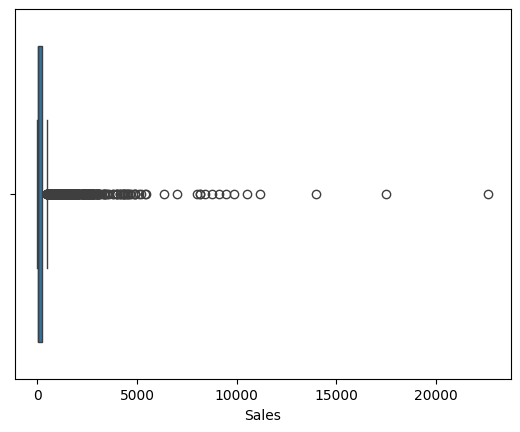

In [64]:
sns.boxplot(data= df, x= 'Sales') # there are many outliers

<Axes: xlabel='Sales', ylabel='Density'>

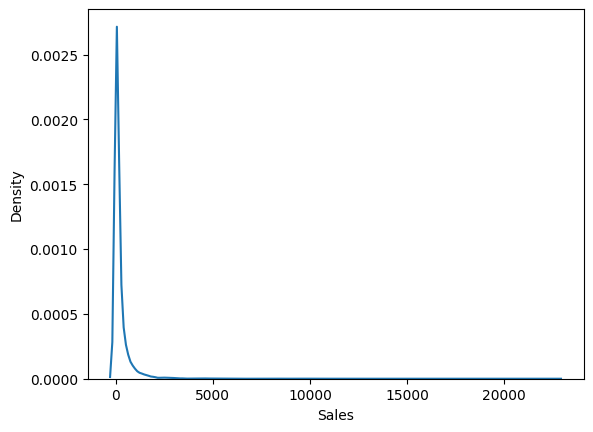

In [65]:
sns.kdeplot(data= df, x= 'Sales') # there are many outliers

In [66]:
df[df['Sales']>15000] # outlier check

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2697,2698,CA-2015-145317,18/03/2015,23/03/2015,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.48
6826,6827,CA-2017-118689,2/10/2017,9/10/2017,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,Indiana,47905,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.95


In [67]:
df[(df['Sales']<15000) & (df['Sales']>5000)] # outlier check

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
165,166,CA-2015-139892,8/9/2015,12/9/2015,Standard Class,BM-11140,Becky Martin,Consumer,United States,San Antonio,Texas,78207,Central,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,8159.952
509,510,CA-2016-145352,16/03/2016,22/03/2016,Standard Class,CM-12385,Christopher Martinez,Consumer,United States,Atlanta,Georgia,30318,South,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,6354.950
683,684,US-2018-168116,4/11/2018,4/11/2018,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,North Carolina,27217,South,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980
2505,2506,CA-2015-143917,25/07/2015,27/07/2015,Second Class,KL-16645,Ken Lonsdale,Consumer,United States,San Francisco,California,94122,West,OFF-SU-10000151,Office Supplies,Supplies,High Speed Automatic Electric Letter Opener,8187.650
2623,2624,CA-2018-127180,22/10/2018,24/10/2018,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,New York,10024,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968
4098,4099,CA-2015-116904,23/09/2015,28/09/2015,Standard Class,SC-20095,Sanjit Chand,Consumer,United States,Minneapolis,Minnesota,55407,Central,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,9449.950
4190,4191,CA-2018-166709,17/11/2018,22/11/2018,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,Delaware,19711,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970
4277,4278,US-2017-107440,16/04/2017,20/04/2017,Standard Class,BS-11365,Bill Shonely,Corporate,United States,Lakewood,New Jersey,8701,East,TEC-MA-10001047,Technology,Machines,"3D Systems Cube Printer, 2nd Generation, Magenta",9099.930
6340,6341,CA-2018-143112,5/10/2018,9/10/2018,Standard Class,TS-21370,Todd Sumrall,Corporate,United States,New York City,New York,10035,East,TEC-MA-10001047,Technology,Machines,"3D Systems Cube Printer, 2nd Generation, Magenta",5199.960
6425,6426,CA-2017-143714,23/05/2017,27/05/2017,Standard Class,CC-12370,Christopher Conant,Consumer,United States,Philadelphia,Pennsylvania,19120,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,8399.976


### no strange data in outliers

In [68]:
df['Sales'].fillna("?", inplace=True)  # fill na with "?"
p1I=df[(df["Product Name"]==p1)&(df['Sales']=='?')].index
p2I=df[(df["Product Name"]==p2)&(df['Sales']=='?')].index
p3I=df[(df["Product Name"]==p3)&(df['Sales']=='?')].index
p4I=df[(df["Product Name"]==p4)&(df['Sales']=='?')].index

In [69]:
df["Sales"].iloc[p1I]=12.96 # fill the '?'  values with median of each product
df["Sales"].iloc[p2I]=191.82
df["Sales"].iloc[p3I]=149.95
df["Sales"].iloc[p4I]=15.48

In [70]:
df.info() # sales still object

<class 'pandas.core.frame.DataFrame'>
Index: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Row ID         9800 non-null   int64 
 1   Order ID       9800 non-null   object
 2   Order Date     9800 non-null   object
 3   Ship Date      9800 non-null   object
 4   Ship Mode      9800 non-null   object
 5   Customer ID    9800 non-null   object
 6   Customer Name  9800 non-null   object
 7   Segment        9800 non-null   object
 8   Country        9800 non-null   object
 9   City           9800 non-null   object
 10  State          9800 non-null   object
 11  Postal Code    9800 non-null   object
 12  Region         9800 non-null   object
 13  Product ID     9800 non-null   object
 14  Category       9800 non-null   object
 15  Sub-Category   9800 non-null   object
 16  Product Name   9800 non-null   object
 17  Sales          9800 non-null   object
dtypes: int64(1), object(17)
memory us

In [71]:
df["Sales"]= pd.to_numeric(df["Sales"]) # convert sales data type to numeric

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   object 
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float64(1)

## Features engineering

In [73]:
df['Order Date']= pd.to_datetime(df['Order Date'], format='%d/%m/%Y') 
df['Ship Date']= pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

In [74]:
df["Year"]= df['Order Date'].dt.year
df["Month"]= df['Order Date'].dt.month
df["Month Name"]= df['Order Date'].dt.month_name()
df['Day']= df['Order Date'].dt.day_name()

In [75]:
df['Shiping Duration']  = (df['Ship Date'] - df['Order Date']) / np.timedelta64(1, 'D') 

In [76]:
df.drop(['Customer ID','Order ID','Product ID','Postal Code'],inplace=True ,axis = 1)

In [77]:
def map_months(x):
    if x in [12, 1, 2]:
        return 'Winter'
    elif x in [3, 4, 5]:
        return 'Spring'
    elif x in [6, 7, 8]:
        return 'Summer'
    elif x in [9, 10, 11]:
        return 'Autumn'

df['Season'] = df['Month'].apply(map_months)

## Analysis

What is the highest year in sales?

In [79]:
df.groupby("Year")['Sales'].sum().sort_values(ascending=False)

Year
2018    722052.0192
2017    600128.6100
2015    479858.3361
2016    459433.4134
Name: Sales, dtype: float64

<Axes: xlabel='Year', ylabel='Sales'>

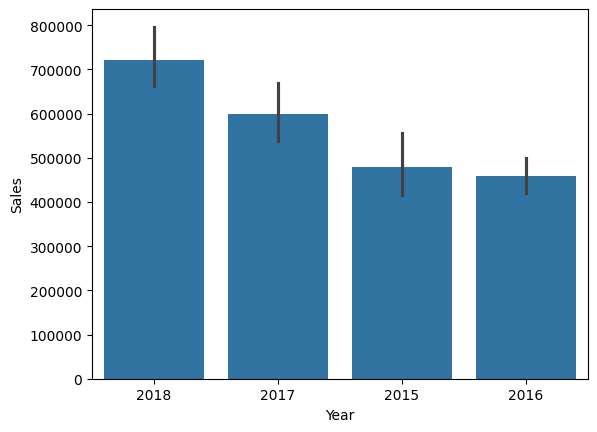

In [80]:
o=df.groupby("Year")['Sales'].sum().sort_values(ascending=False).index
sns.barplot(data= df , x='Year', y = 'Sales',estimator=sum,order=o)

What is the highest Month in sales in 2018

In [81]:
df[df['Year']==2018].groupby("Month Name")['Sales'].sum().sort_values(ascending=False).head(1)

Month Name
November    117938.155
Name: Sales, dtype: float64

2018 the highest year in sales and November is highest month in 2018

In [82]:
df.groupby("Month Name")['Sales'].sum().sort_values(ascending=False)

Month Name
November     350161.7110
December     321480.1695
September    300105.5397
October      199496.2947
March        197573.5872
August       157315.9270
May          154086.7237
June         145837.5233
July         145469.1570
April        136283.0006
January       94291.6296
February      59371.1154
Name: Sales, dtype: float64

Is November the highest month in the 4 Years?

In [83]:
df.groupby("Month Name")['Sales'].sum().sort_values(ascending=False)

Month Name
November     350161.7110
December     321480.1695
September    300105.5397
October      199496.2947
March        197573.5872
August       157315.9270
May          154086.7237
June         145837.5233
July         145469.1570
April        136283.0006
January       94291.6296
February      59371.1154
Name: Sales, dtype: float64

<Axes: xlabel='Month', ylabel='Sales'>

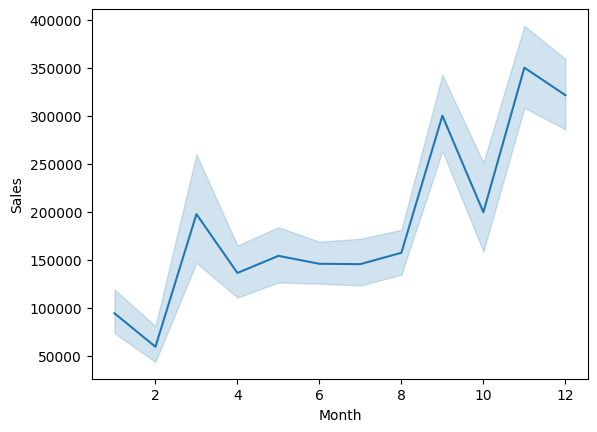

In [84]:
sns.lineplot(data=df , x= 'Month', y='Sales',estimator=sum)

What is The lowest 3 months ?

In [85]:
df.groupby("Month Name")['Sales'].sum().sort_values(ascending=True).head(3)

Month Name
February     59371.1154
January      94291.6296
April       136283.0006
Name: Sales, dtype: float64

Yes November is the highest month and the lowest month is February

what is the best season in sales ?

In [86]:
df.groupby('Season')['Sales'].sum().sort_values(ascending=False).head(1)

Season
Autumn    849763.5454
Name: Sales, dtype: float64

<Axes: xlabel='Season', ylabel='Sales'>

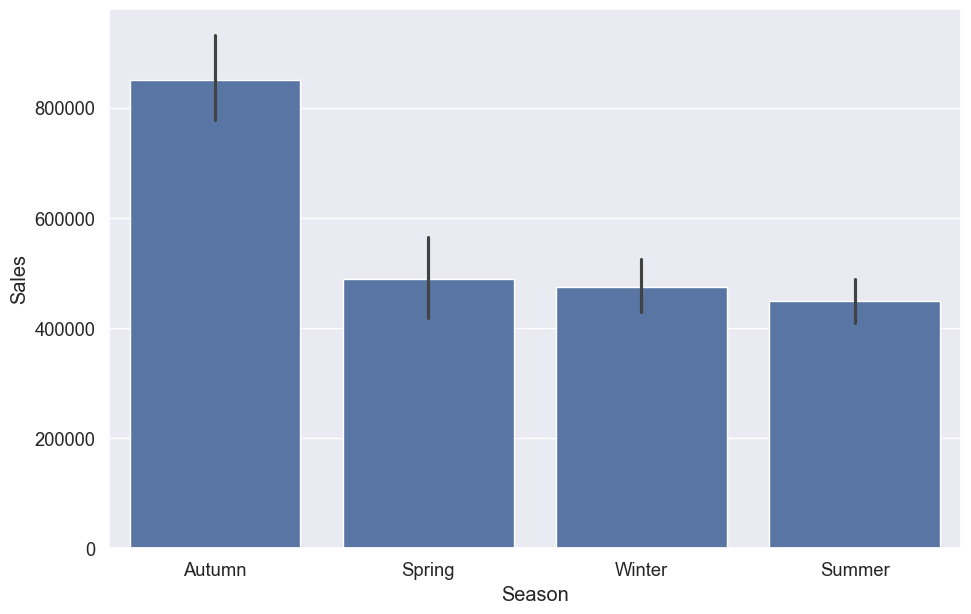

In [87]:
sns.set(rc={'figure.figsize':[11,7]},font_scale=1.2)
o=df.groupby('Season')['Sales'].sum().sort_values(ascending=False).index
sns.barplot(data=df , x= "Season", y='Sales',order=o,estimator=sum)

sales value distribution by day

In [88]:
df.groupby('Day')['Sales'].sum().sort_values(ascending=False)

Day
Saturday     420904.8823
Tuesday      420471.9843
Sunday       377868.7779
Monday       348787.6816
Wednesday    315888.9722
Friday       234710.8402
Thursday     142839.2402
Name: Sales, dtype: float64

<Axes: xlabel='Day', ylabel='Sales'>

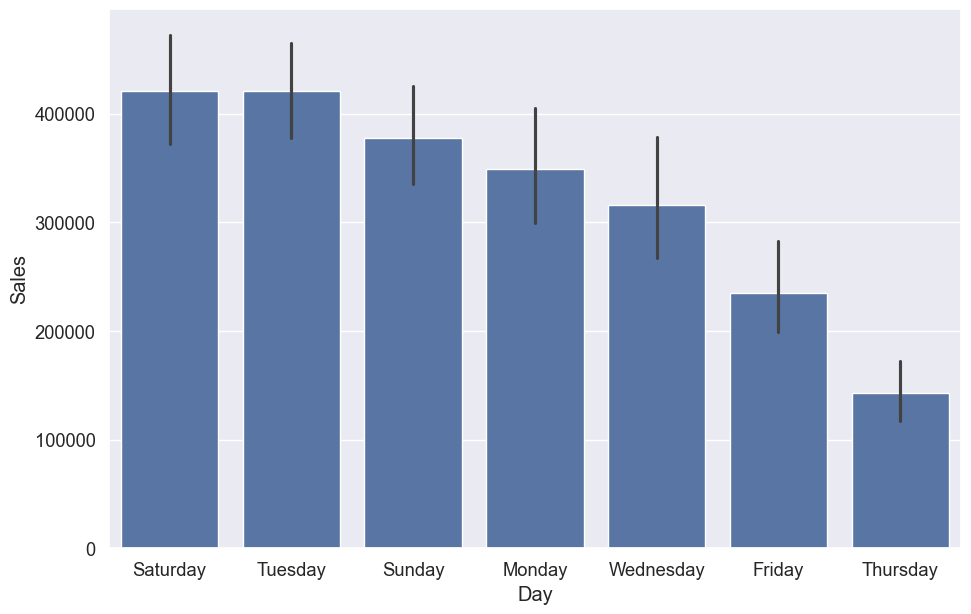

In [89]:
o= df.groupby('Day')['Sales'].sum().sort_values(ascending=False).index
sns.barplot(data= df, x= 'Day', y= 'Sales', order=o, estimator=sum)

sales count distribution by day

In [90]:
df['Day'].value_counts()

Day
Tuesday      1889
Saturday     1786
Sunday       1695
Monday       1593
Wednesday    1229
Friday       1067
Thursday      541
Name: count, dtype: int64

<Axes: xlabel='Day', ylabel='count'>

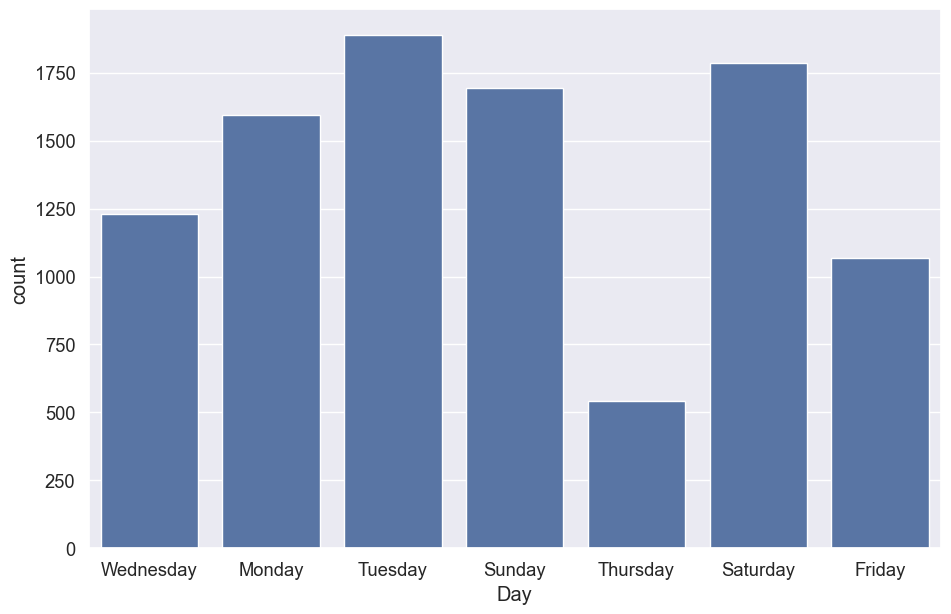

In [91]:
sns.countplot(data=df, x='Day')

Top 10 Cities in sales

In [92]:
df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)

City
New York City    252462.5470
Los Angeles      173420.1810
Seattle          116106.3220
San Francisco    109037.2500
Philadelphia     108847.7470
Houston           63956.1428
Chicago           47820.1330
San Diego         47521.0290
Jacksonville      44713.1830
Detroit           42446.9440
Name: Sales, dtype: float64

<Axes: xlabel='City', ylabel='Sales'>

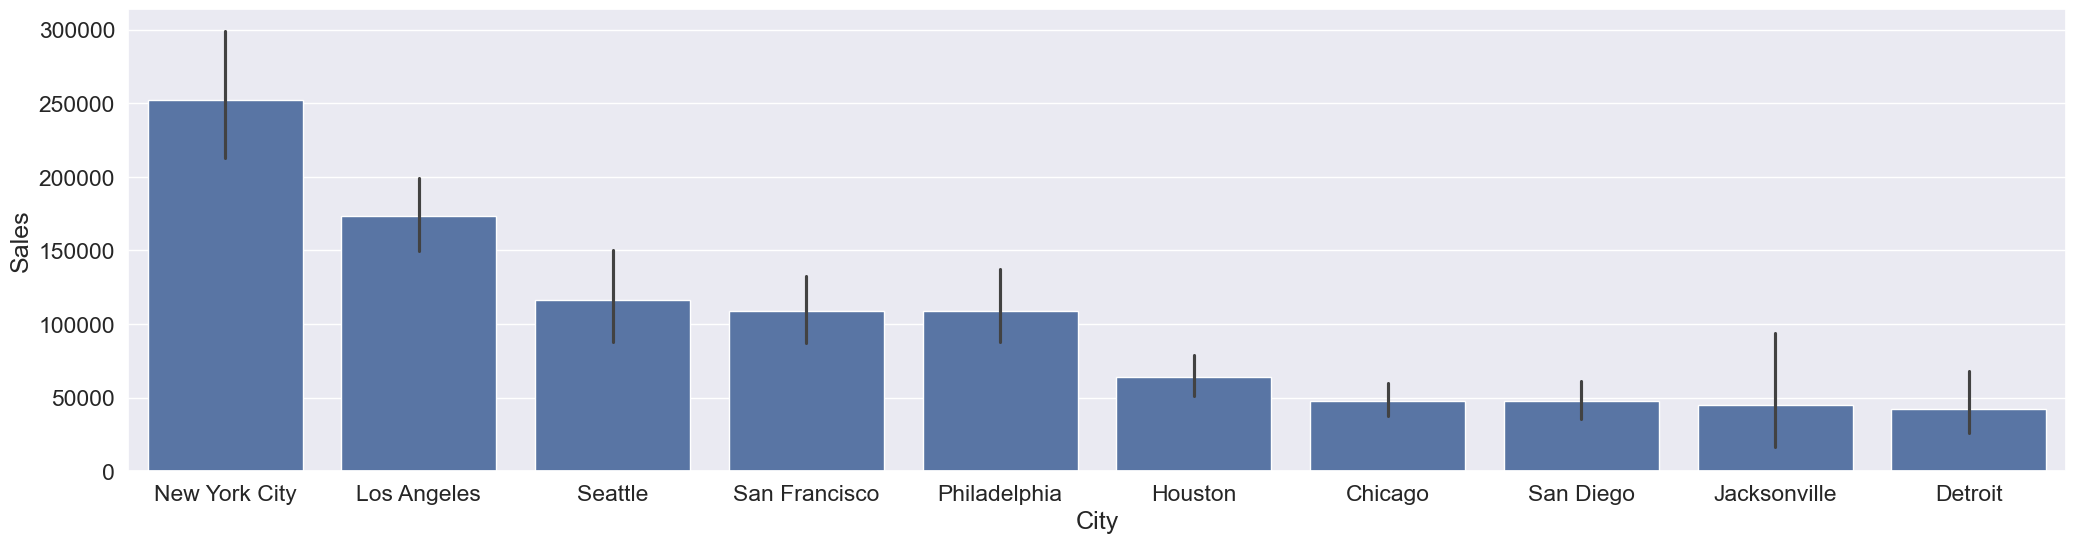

In [93]:
sns.set(rc={'figure.figsize':[25,6]},font_scale=1.5)
o=df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10).index
sns.barplot(data=df, x= "City", y="Sales",order=o,estimator=sum)

In [94]:
df.groupby('City')['Sales'].sum().sort_values(ascending=True).head(10)

City
Abilene            1.392
Elyria             1.824
Jupiter            2.064
Pensacola          2.214
Ormond Beach       2.808
San Luis Obispo    3.620
Springdale         4.300
Layton             4.960
Keller             6.000
Missouri City      6.370
Name: Sales, dtype: float64

lowest 10 cities in sales

<Axes: xlabel='City', ylabel='Sales'>

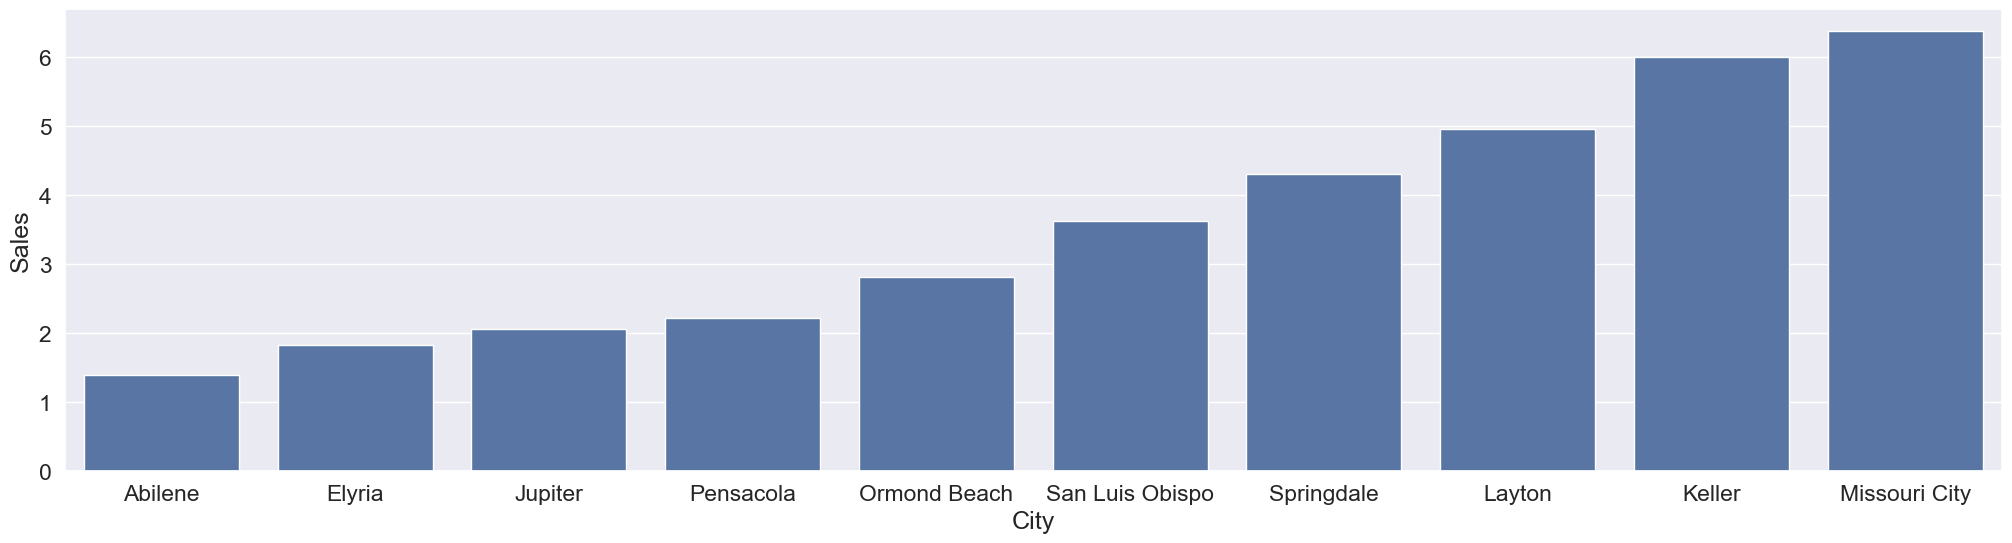

In [95]:
o=df.groupby('City')['Sales'].sum().sort_values(ascending=True).head(10).index
sns.barplot(data=df, x= "City", y="Sales",order=o,estimator=sum)

Top 10 states in sales

In [96]:
df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)

State
California      446238.6535
New York        306361.1470
Texas           168572.5322
Washington      135206.8500
Pennsylvania    116282.6480
Florida          88433.9400
Illinois         79236.5170
Michigan         76136.0740
Ohio             75130.3500
Virginia         70636.7200
Name: Sales, dtype: float64

<Axes: xlabel='State', ylabel='Sales'>

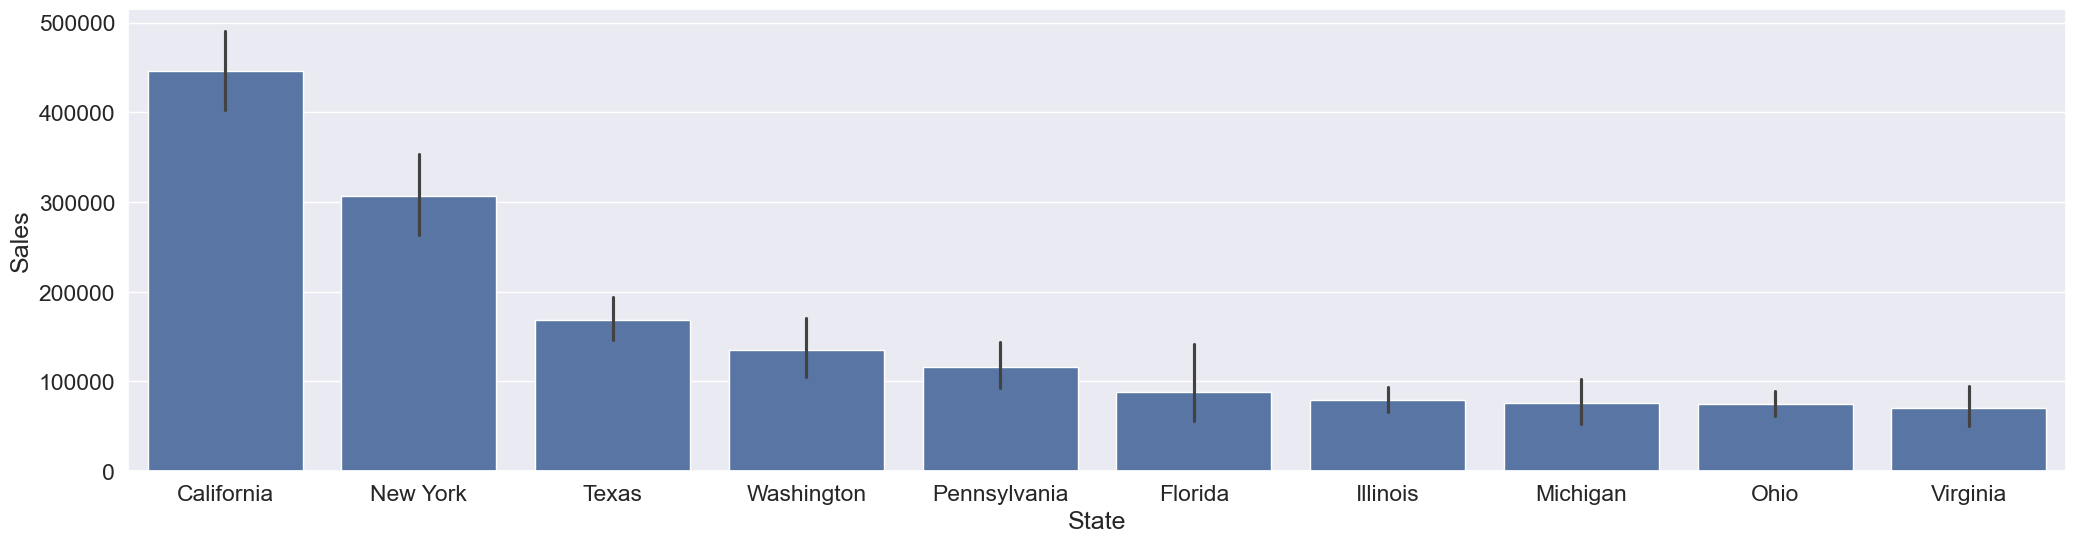

In [97]:
o=df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10).index
sns.barplot(data=df, x= "State", y="Sales",order=o,estimator=sum)

Lowest 10 states in sales

In [98]:
df.groupby('State')['Sales'].sum().sort_values(ascending=True).head(10)

State
North Dakota             919.910
West Virginia           1209.824
Maine                   1270.530
South Dakota            1315.560
Wyoming                 1603.136
District of Columbia    2865.020
Kansas                  2914.310
Idaho                   4382.486
Iowa                    4443.560
New Mexico              4783.522
Name: Sales, dtype: float64

<Axes: xlabel='State', ylabel='Sales'>

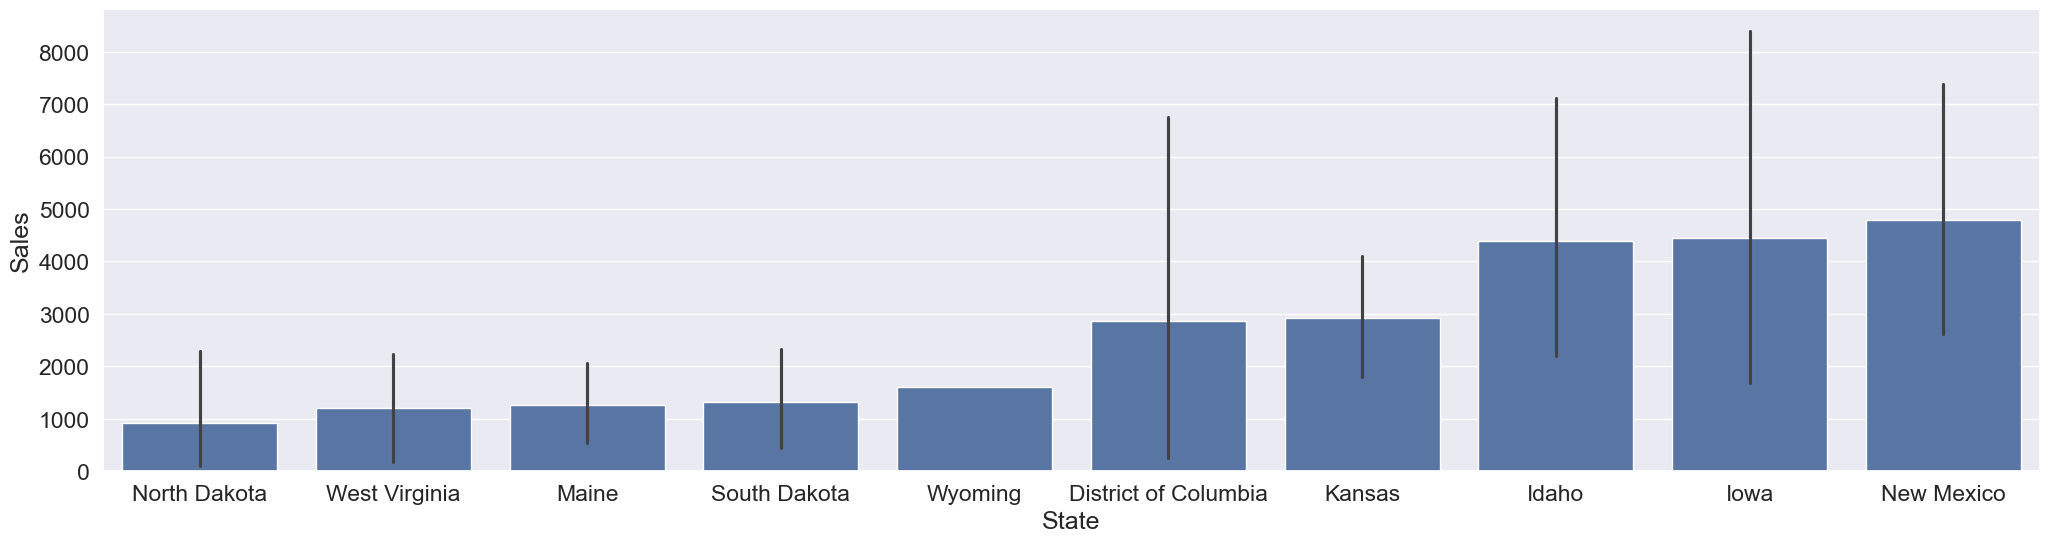

In [99]:
o=df.groupby('State')['Sales'].sum().sort_values(ascending=True).head(10).index
sns.barplot(data=df, x= "State", y="Sales",order=o,estimator=sum)

Sales by region

In [100]:
df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

Region
West       710151.8745
East       669524.7240
Central    492646.9132
South      389148.8670
Name: Sales, dtype: float64

<Axes: xlabel='Region', ylabel='Sales'>

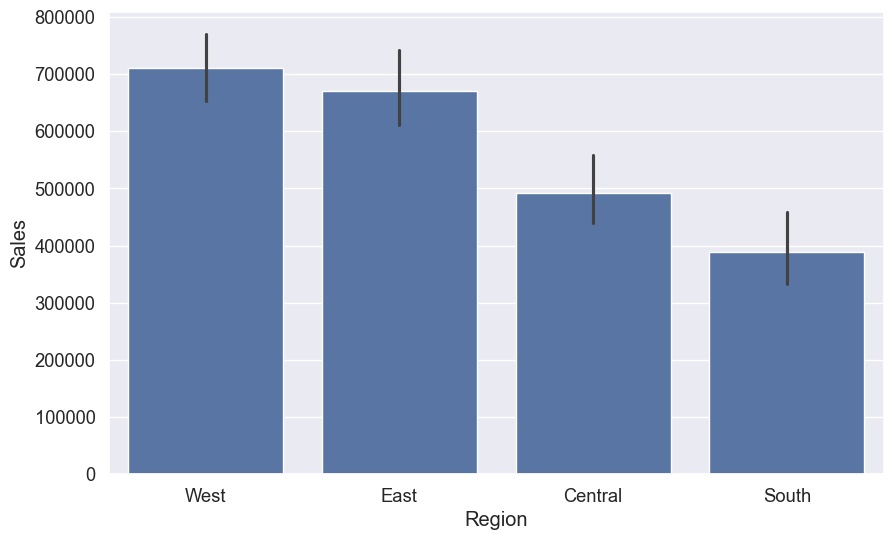

In [101]:
sns.set(rc={'figure.figsize':[10,6]},font_scale=1.2)
o=df.groupby('Region')['Sales'].sum().sort_values(ascending=False).index
sns.barplot(data=df, x= "Region", y="Sales",estimator=sum,order=o)

Sales by Category

In [102]:
df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

Category
Technology         827455.8730
Furniture          728594.6357
Office Supplies    705421.8700
Name: Sales, dtype: float64

<Axes: xlabel='Category', ylabel='Sales'>

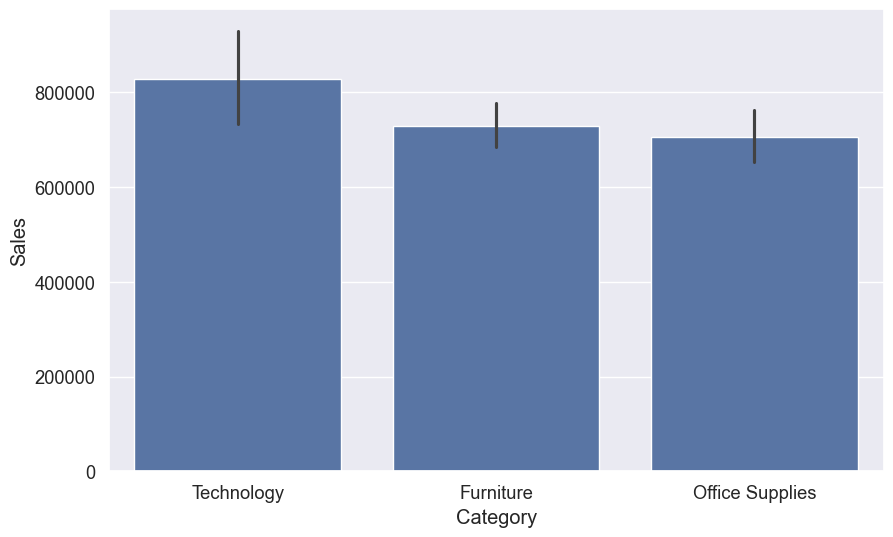

In [103]:
o=df.groupby('Category')['Sales'].sum().sort_values(ascending=False).index
sns.barplot(data=df , x='Category', y='Sales',estimator=sum, order=o)

Distribution of sales by subcategory in descending order

In [104]:
df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)

Sub-Category
Phones         327782.4480
Chairs         322822.7310
Storage        219343.3920
Tables         202810.6280
Binders        200028.7850
Machines       189238.6310
Accessories    164186.7000
Copiers        146248.0940
Bookcases      113813.1987
Appliances     104624.4010
Furnishings     89148.0780
Paper           76821.8420
Supplies        46420.3080
Art             26705.4100
Envelopes       16128.0460
Labels          12347.7260
Fasteners        3001.9600
Name: Sales, dtype: float64

<Axes: xlabel='Sub-Category', ylabel='Sales'>

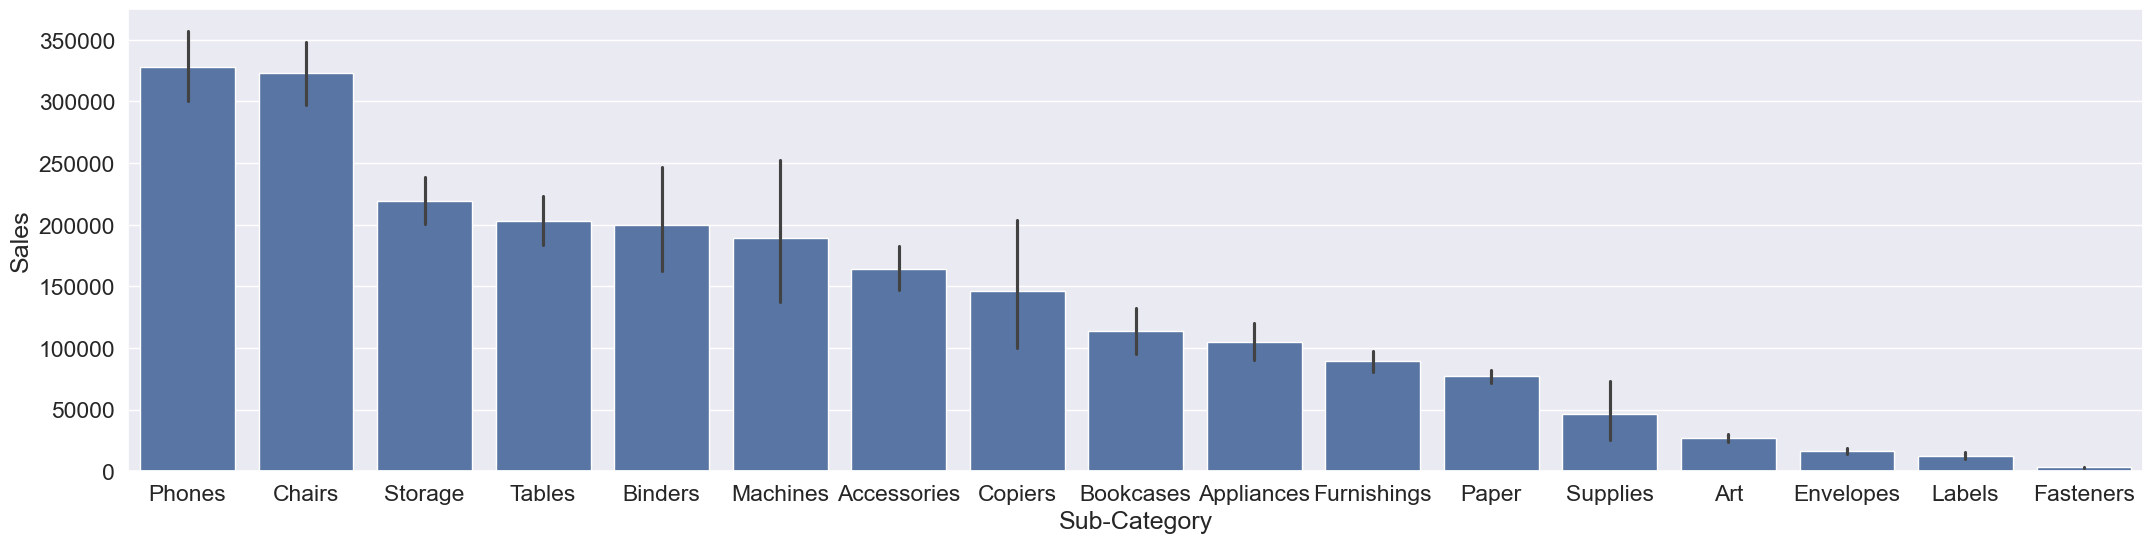

In [105]:
sns.set(rc={'figure.figsize':[26,6]},font_scale=1.5)
o=df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).index
sns.barplot(data=df , x='Sub-Category', y='Sales',estimator=sum, order=o)

Highest 10 products in sales in descending order

In [106]:
df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64

<Axes: xlabel='Sales', ylabel='Product Name'>

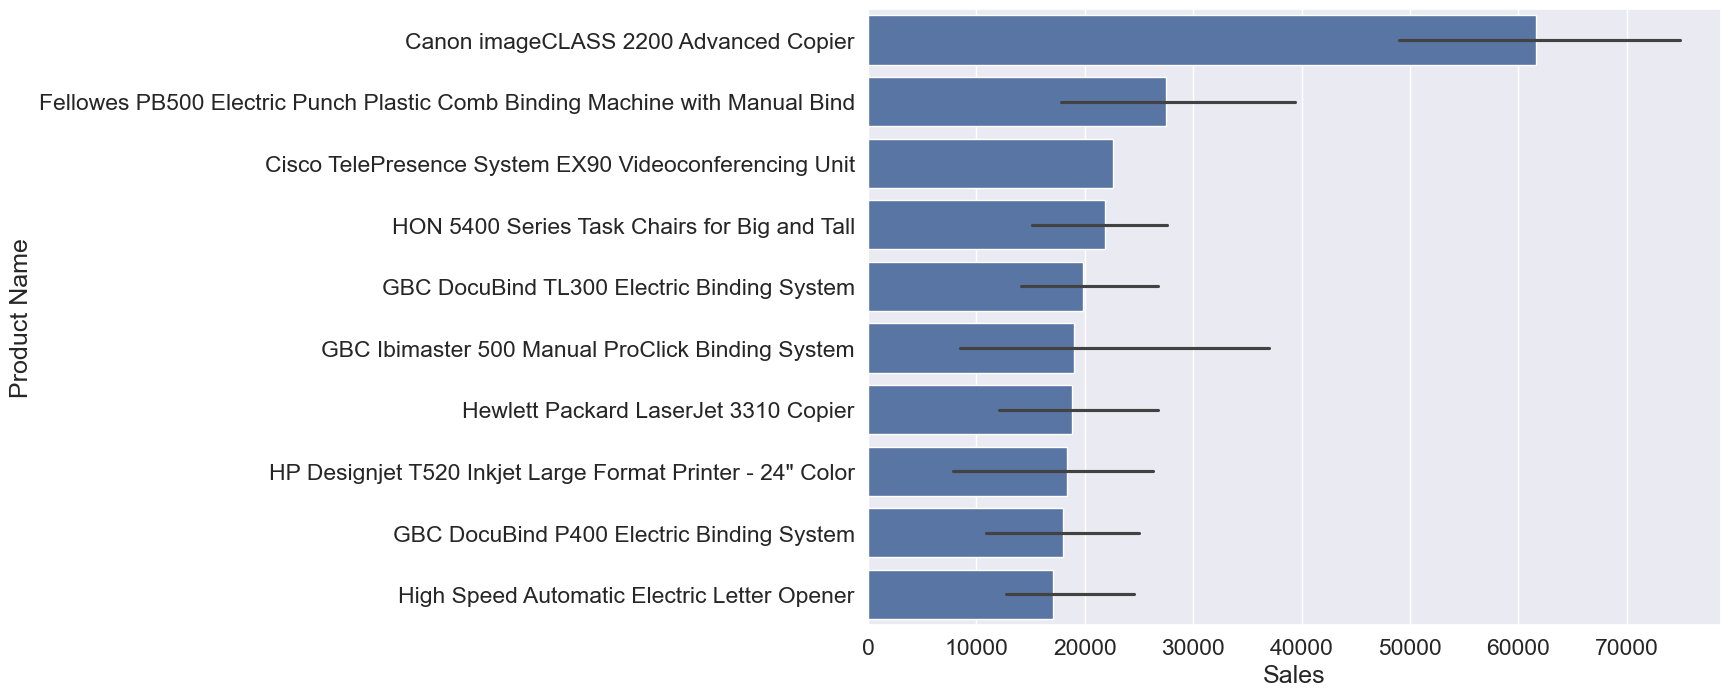

In [107]:
sns.set(rc={'figure.figsize':[11,8]},font_scale=1.5)
o=df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10).index
sns.barplot(data=df , y='Product Name', x='Sales',estimator=sum,order=o)

Highest 10 products in Count in descending order

In [108]:
df['Product Name'].value_counts().head(10)

Product Name
Staple envelope                               47
Staples                                       46
Easy-staple paper                             44
Avery Non-Stick Binders                       20
Staples in misc. colors                       18
Staple remover                                18
Storex Dura Pro Binders                       17
KI Adjustable-Height Table                    17
Staple-based wall hangings                    16
Situations Contoured Folding Chairs, 4/Set    15
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Product Name'>

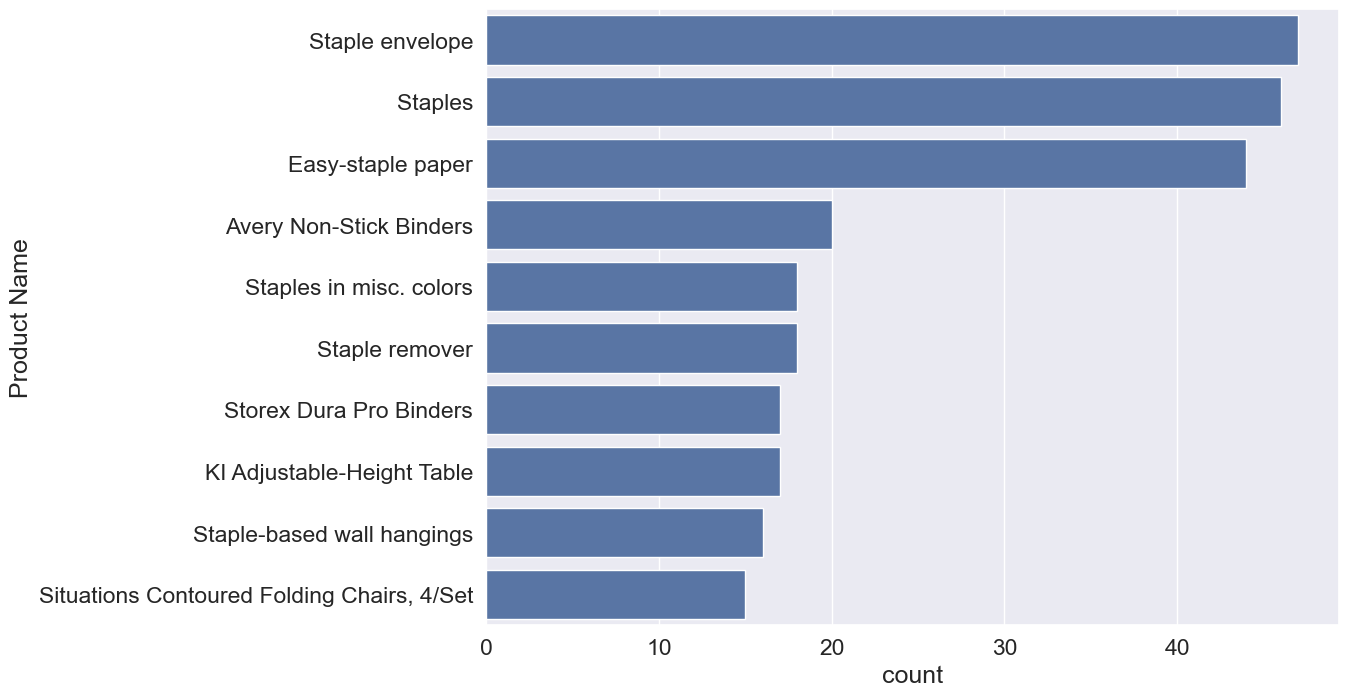

In [109]:
o=df['Product Name'].value_counts().head(10).index
sns.countplot(data= df , y ='Product Name', order=o)

Highest 10 products in Count in ascending order

In [110]:
df.groupby('Product Name')['Sales'].sum().sort_values(ascending=True).head(10)

Product Name
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac    1.624
Avery 5                                                             5.760
Xerox 20                                                            6.480
Grip Seal Envelopes                                                 7.072
Acme Serrated Blade Letter Opener                                   7.632
Avery Hi-Liter Pen Style Six-Color Fluorescent Set                  7.700
Avery Hi-Liter Comfort Grip Fluorescent Highlighter, Yellow Ink     7.800
Xerox 1989                                                          7.968
4009 Highlighters                                                   8.040
Stockwell Gold Paper Clips                                          8.096
Name: Sales, dtype: float64

<Axes: xlabel='Sales', ylabel='Product Name'>

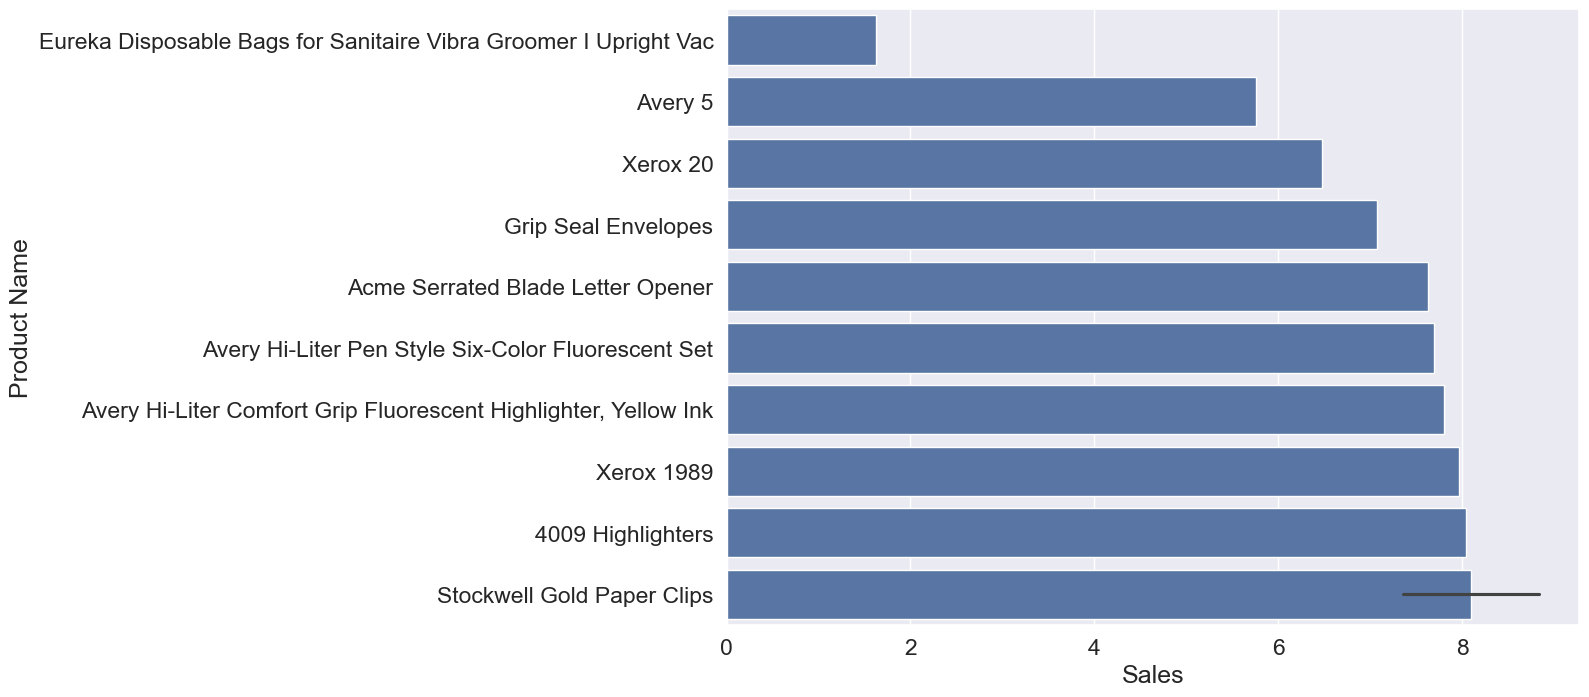

In [111]:
sns.set(rc={'figure.figsize':[11,8]},font_scale=1.5)
o=df.groupby('Product Name')['Sales'].sum().sort_values(ascending=True).head(10).index
sns.barplot(data=df , y='Product Name', x='Sales',estimator=sum,order=o)

Best 10 customers in value 

In [112]:
df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)

Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14078.394
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64

<Axes: xlabel='Sales', ylabel='Customer Name'>

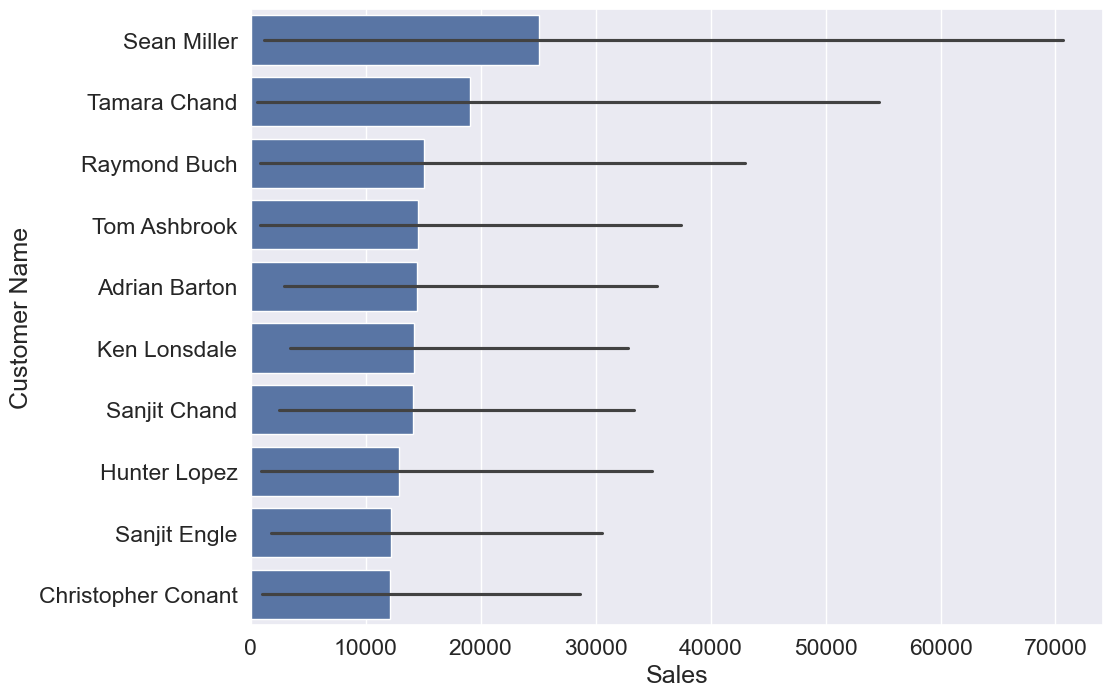

In [113]:
o=df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10).index
sns.barplot(data=df,x='Sales',y='Customer Name',estimator=sum,order=o)

Are the Top 10 Most Valuable Clients Distinguished?

In [114]:
i=df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10).index
d=df[df['Customer Name'].isin(i)]
d[['Customer Name','Segment']].value_counts()

Customer Name       Segment    
Ken Lonsdale        Consumer       29
Sanjit Chand        Consumer       22
Adrian Barton       Consumer       20
Sanjit Engle        Consumer       19
Raymond Buch        Consumer       18
Sean Miller         Home Office    15
Tamara Chand        Corporate      12
Christopher Conant  Consumer       11
Hunter Lopez        Consumer       11
Tom Ashbrook        Home Office    10
Name: count, dtype: int64

No, the store must distinguish those customers by new segments like premium customers or something like that to care about them.

Best 10 customers in value 

In [115]:
df['Customer Name'].value_counts().head(10)

Customer Name
William Brown          35
Matt Abelman           34
Paul Prost             34
John Lee               33
Jonathan Doherty       32
Chloris Kastensmidt    32
Seth Vernon            32
Arthur Prichep         31
Emily Phan             31
Zuschuss Carroll       31
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Customer Name'>

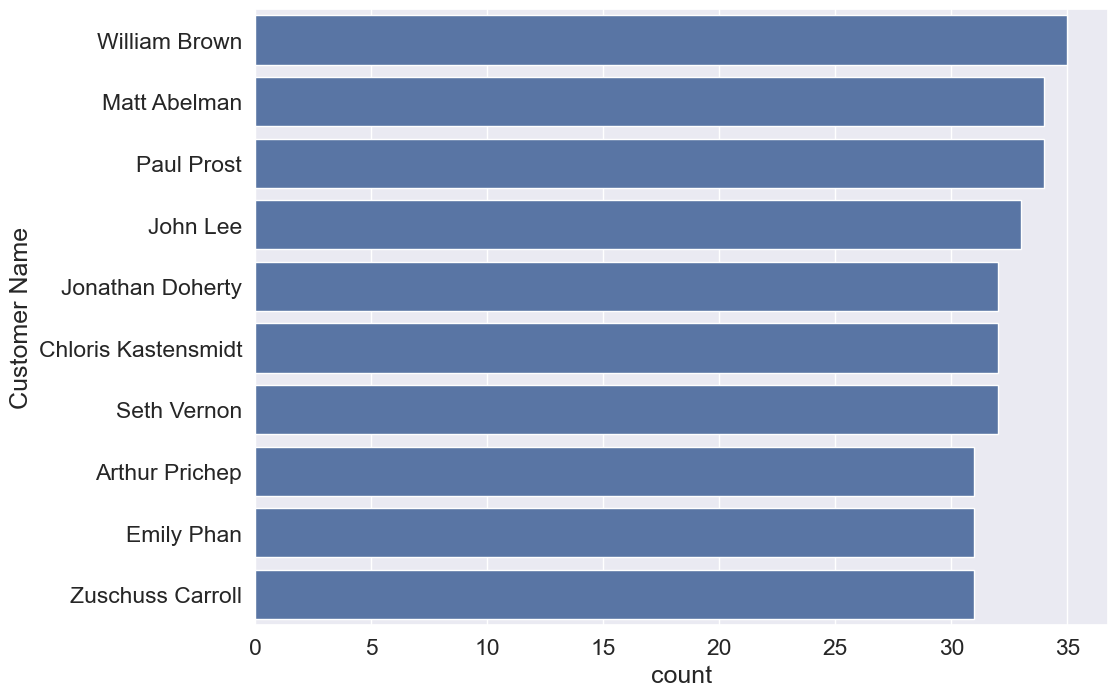

In [116]:
o=df['Customer Name'].value_counts().head(10).index
sns.countplot(data=df, y='Customer Name',order=o)

In [117]:
df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)

Segment
Consumer       1.147990e+06
Corporate      6.885001e+05
Home Office    4.249822e+05
Name: Sales, dtype: float64

<Axes: xlabel='Segment', ylabel='Sales'>

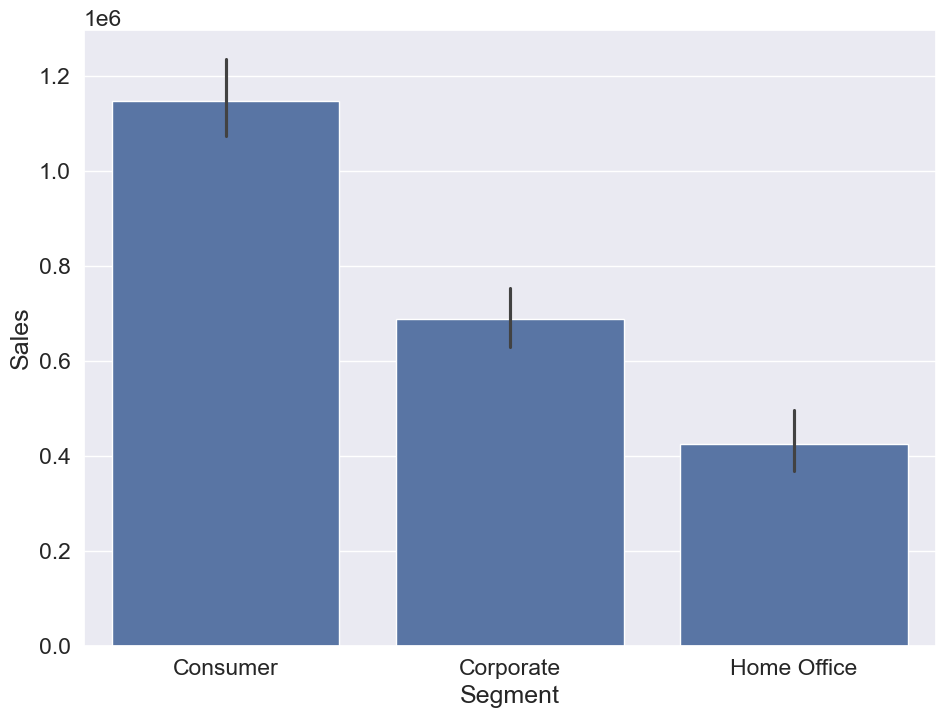

In [118]:
o= df.groupby('Segment')['Sales'].sum().sort_values(ascending=False).index
sns.barplot(data= df, x= 'Segment',y= 'Sales',estimator=sum, order= o)

shipping mode distribution by sales value.

In [119]:
df.groupby('Ship Mode')['Sales'].sum().sort_values(ascending=False)

Ship Mode
Standard Class    1.340761e+06
Second Class      4.499202e+05
First Class       3.455723e+05
Same Day          1.252190e+05
Name: Sales, dtype: float64

<Axes: xlabel='Ship Mode', ylabel='Sales'>

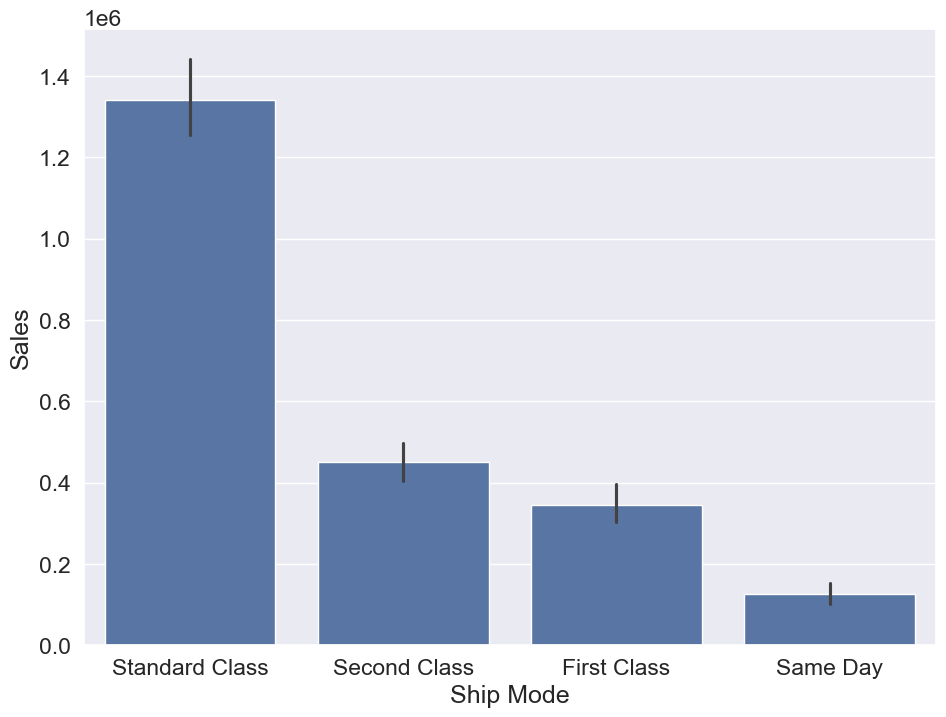

In [120]:
o= df.groupby('Ship Mode')['Sales'].sum().sort_values(ascending=False).index
sns.barplot(data= df, x= 'Ship Mode', y= 'Sales',estimator=sum, order= o)

shipping mode distribution by sales count.

In [121]:
df['Ship Mode'].value_counts()

Ship Mode
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: count, dtype: int64

<Axes: xlabel='Ship Mode', ylabel='count'>

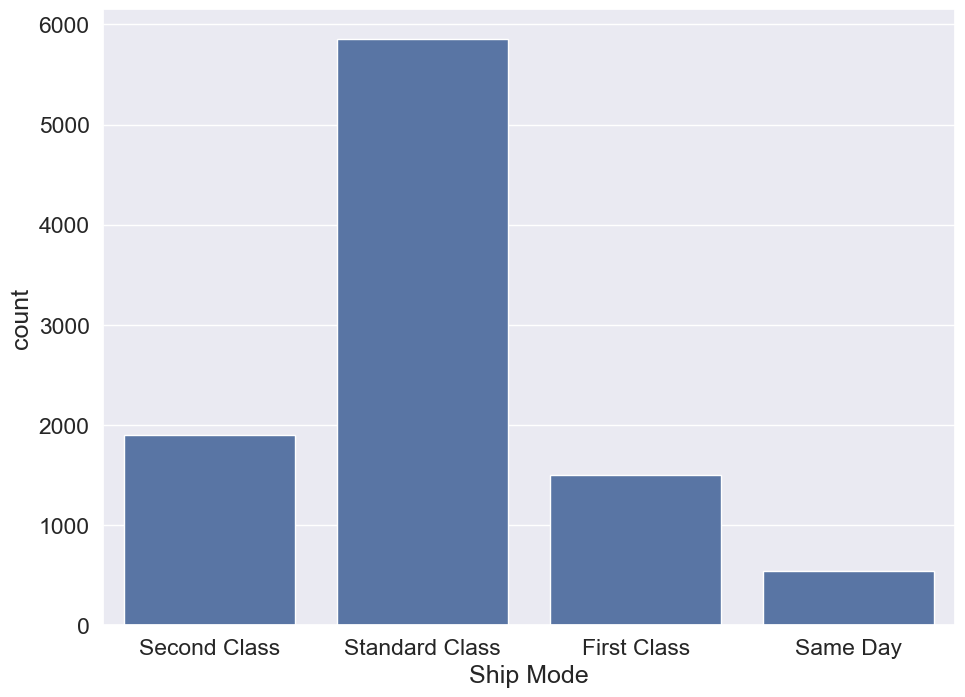

In [122]:
sns.countplot(data= df, x= 'Ship Mode')

shipping duration distribution.

In [123]:
df['Shiping Duration'].value_counts()

Shiping Duration
4.0    2718
5.0    2147
2.0    1295
6.0    1170
3.0     978
7.0     615
0.0     514
1.0     363
Name: count, dtype: int64

<Axes: xlabel='Shiping Duration', ylabel='count'>

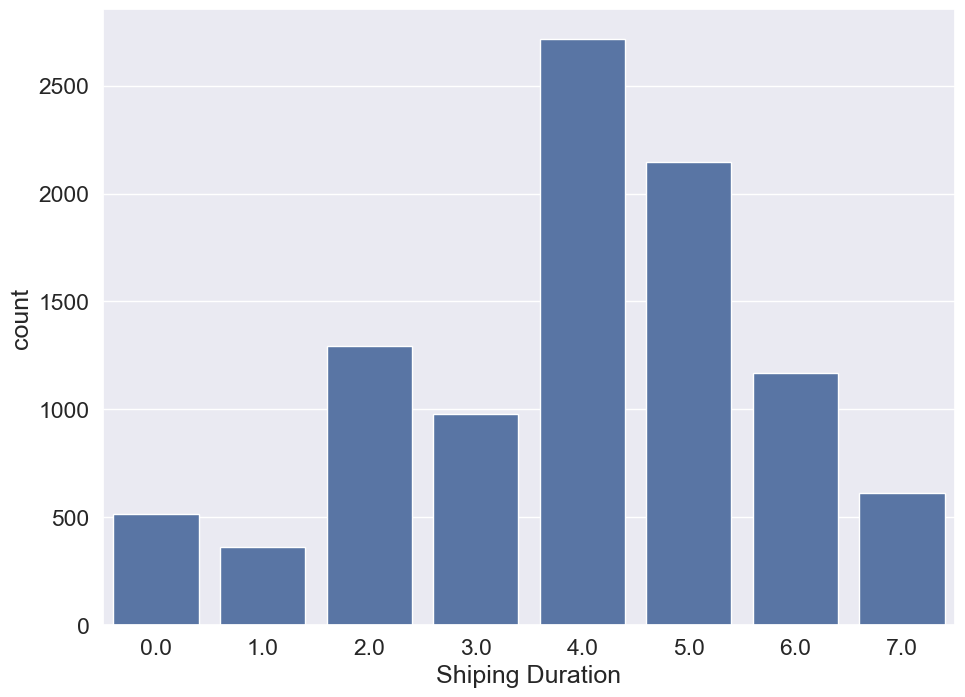

In [124]:
sns.countplot(data= df, x= 'Shiping Duration')

Shipping mode accuracy and delay rate.

In [125]:
df[df['Ship Mode']=='Standard Class']['Shiping Duration'].value_counts()

Shiping Duration
4.0    2349
5.0    1724
6.0    1170
7.0     615
3.0       1
Name: count, dtype: int64

In [126]:
df[df['Ship Mode']=='Second Class']['Shiping Duration'].value_counts()

Shiping Duration
2.0    738
5.0    423
3.0    372
4.0    368
1.0      1
Name: count, dtype: int64

In [127]:
df[df['Ship Mode']=='First Class']['Shiping Duration'].value_counts()

Shiping Duration
3.0    605
2.0    557
1.0    338
4.0      1
Name: count, dtype: int64

In [128]:
df[df['Ship Mode']=='Same Day']['Shiping Duration'].value_counts()

Shiping Duration
0.0    514
1.0     24
Name: count, dtype: int64

<Axes: xlabel='Ship Mode', ylabel='count'>

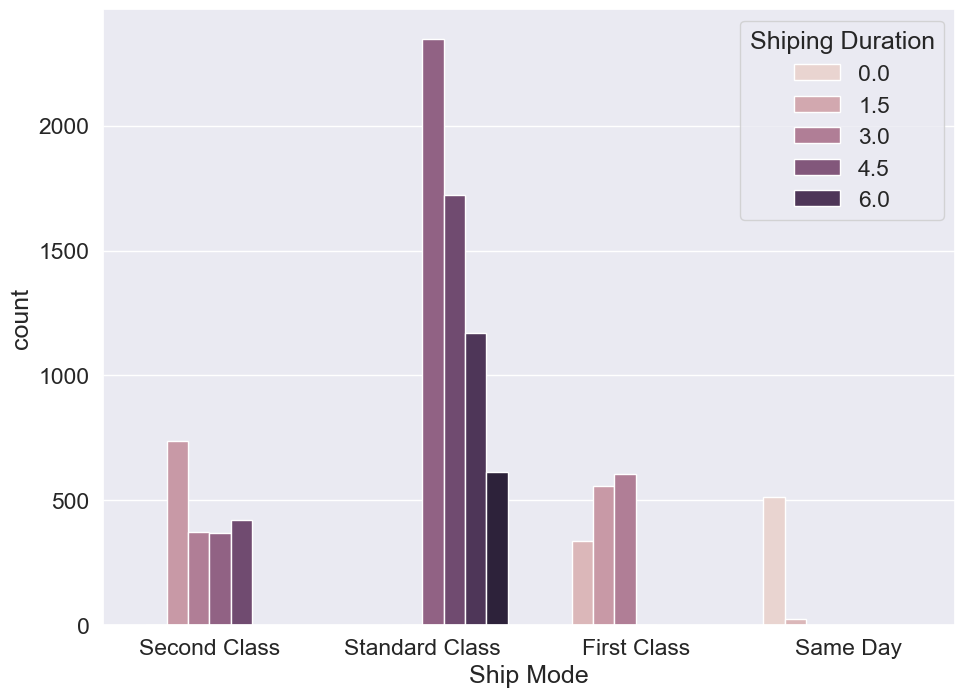

In [129]:
sns.countplot(data= df, x='Ship Mode' ,hue='Shiping Duration')

delay rate in the same day shiping

In [130]:
on_time=df[df['Ship Mode']=='Same Day']['Shiping Duration'].value_counts()[0]
late=df[df['Ship Mode']=='Same Day']['Shiping Duration'].value_counts()[1]
late_persentetge = late/len(df[df['Ship Mode']=='Same Day']['Shiping Duration']) * 100
late_persentetge

np.float64(4.4609665427509295)

## Conclusion
1- It has been shown that Sales kept increasing from 2015 to 2018
2- Highst Year in sales is 2018
3- Highst Month in sales is Novmber
4- Lowest Month is February
5- Best season in sales is Autumn
6- Highst day in sales is saturday
7- Lowest day in sales is thursday
8- Highst City in sales is New York city and the lowest on is Abline
9- Highst state in sales is California and the lowes one is North Dakota
10- Highst region  is West
11- Best Category in sales is Technology
12- Best Sub-Category is Phones
13- Highst product in sales is Canon imageCLASS 2200 Advanced Copier
14- It has been shown the most customers that buy from the store.
15- The store must distinguish those customers by new segments like premium customers or something like that to care about them.
16- It has been shown the shiping mode distribution and duration and aslo delay rate
